<a href="https://colab.research.google.com/github/gus-s-ramos/AlgoritmoAtividadeFinal/blob/main/pratica/ae_atv_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import random
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Exemplo de Função de Fitness
# (maximizar f(x) = x * sin(x), no intervalo [0,10])
# ============================================================
def fitness_function(x):
    return x * np.sin(x)

# Gera população inicial
def gerar_populacao(tamanho, limites):
    return [random.uniform(*limites) for _ in range(tamanho)]

# Avalia população
def avaliar_populacao(populacao):
    return [fitness_function(ind) for ind in populacao]

# ============================================================
# Métodos de Seleção
# ============================================================

# 1️⃣ Seleção por Ranking
def selecao_ranking(populacao, fitness, num_pais):
    ordenados = sorted(list(zip(populacao, fitness)), key=lambda x: x[1])
    ranks = np.arange(1, len(populacao) + 1)
    probs = ranks / ranks.sum()
    escolhidos = np.random.choice([p for p, _ in ordenados], size=num_pais, p=probs)
    return list(escolhidos)

# 2️⃣ Seleção por Elitismo
def selecao_elitismo(populacao, fitness, num_pais):
    elite_idx = np.argsort(fitness)[-num_pais:]
    return [populacao[i] for i in elite_idx]

# 3️⃣ Seleção Estocástica Universal (SUS)
def selecao_sus(populacao, fitness, num_pais):
    soma_fit = sum(fitness)
    probs = [f / soma_fit for f in fitness]
    cumsum = np.cumsum(probs)
    start = random.uniform(0, 1/num_pais)
    pontos = [start + i/num_pais for i in range(num_pais)]
    pais = []
    i = 0
    for p in pontos:
        while p > cumsum[i]:
            i += 1
        pais.append(populacao[i])
    return pais

# 4️⃣ Seleção por Bolsa de Sobrevivência (Steady-State)
def selecao_steady_state(populacao, fitness, num_substituicoes):
    descendentes = gerar_populacao(num_substituicoes, (0, 10))
    fit_desc = avaliar_populacao(descendentes)
    # Substitui piores indivíduos
    pior_idx = np.argsort(fitness)[:num_substituicoes]
    for i, idx in enumerate(pior_idx):
        populacao[idx] = descendentes[i]
        fitness[idx] = fit_desc[i]
    return populacao

# 5️⃣ Seleção por Torneio Estocástico
def selecao_torneio_estocastico(populacao, fitness, num_pais, prob=0.8):
    pais = []
    for _ in range(num_pais):
        i1, i2 = random.sample(range(len(populacao)), 2)
        if random.random() < prob:
            vencedor = populacao[i1] if fitness[i1] > fitness[i2] else populacao[i2]
        else:
            vencedor = populacao[i2] if fitness[i1] > fitness[i2] else populacao[i1]
        pais.append(vencedor)
    return pais

# 6️⃣ Seleção por Idade (Age-Based)
def selecao_por_idade(populacao, idades, fitness, max_idade, num_pais):
    sobreviventes = [p for p, idade in zip(populacao, idades) if idade < max_idade]
    if len(sobreviventes) < num_pais:
        sobreviventes += gerar_populacao(num_pais - len(sobreviventes), (0, 10))
    return random.sample(sobreviventes, num_pais)

# ============================================================
# Operadores Genéticos Simples
# ============================================================
def cruzamento(p1, p2):
    alpha = random.random()
    return alpha * p1 + (1 - alpha) * p2

def mutacao(ind, taxa=0.1, limites=(0,10)):
    if random.random() < taxa:
        ind += np.random.normal(0, 0.5)
        ind = np.clip(ind, *limites)
    return ind

# ============================================================
# Função Principal do AG
# ============================================================
def algoritmo_genetico(selecao, geracoes=50, tamanho_pop=20, limites=(0,10)):
    populacao = gerar_populacao(tamanho_pop, limites)
    idades = [0]*tamanho_pop
    historico = []

    for g in range(geracoes):
        fitness = avaliar_populacao(populacao)
        melhor = max(fitness)
        historico.append(melhor)

        # Seleção
        if selecao == "ranking":
            pais = selecao_ranking(populacao, fitness, tamanho_pop)
        elif selecao == "elitismo":
            pais = selecao_elitismo(populacao, fitness, tamanho_pop)
        elif selecao == "sus":
            pais = selecao_sus(populacao, fitness, tamanho_pop)
        elif selecao == "steady":
            populacao = selecao_steady_state(populacao, fitness, 2)
            continue
        elif selecao == "torneio_est":
            pais = selecao_torneio_estocastico(populacao, fitness, tamanho_pop)
        elif selecao == "idade":
            pais = selecao_por_idade(populacao, idades, fitness, max_idade=10, num_pais=tamanho_pop)
            idades = [i+1 for i in idades]
        else:
            raise ValueError("Método de seleção inválido.")

        # Cruzamento e mutação
        nova_pop = []
        for i in range(0, tamanho_pop, 2):
            p1, p2 = pais[i], pais[i+1]
            filho1 = mutacao(cruzamento(p1, p2))
            filho2 = mutacao(cruzamento(p2, p1))
            nova_pop += [filho1, filho2]
        populacao = nova_pop

    return historico




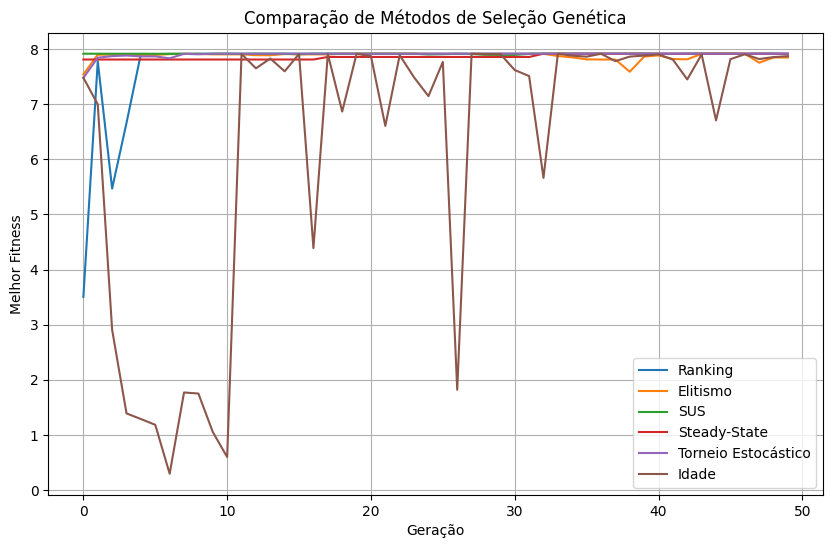

In [ ]:
# ============================================================
# Execução e Visualização
# ============================================================

metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo",
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

plt.figure(figsize=(10,6))
for nome, cod in metodos.items():
    historico = algoritmo_genetico(cod)
    plt.plot(historico, label=nome)

plt.title("Comparação de Métodos de Seleção Genética")
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.legend()
plt.grid(True)
plt.show()

| Método                  | Ideia central                                           | Vantagem principal           |
| ----------------------- | ------------------------------------------------------- | ---------------------------- |
| **Ranking**             | Probabilidade baseada na posição, não no valor absoluto | Evita dominância precoce     |
| **Elitismo**            | Mantém os melhores indivíduos                           | Garante progresso contínuo   |
| **SUS**                 | Amostragem uniforme tipo roleta                         | Reduz variância              |
| **Steady-State**        | Substitui poucos indivíduos por vez                     | Mantém diversidade           |
| **Torneio Estocástico** | Probabilidade de escolha não determinística             | Reduz convergência prematura |
| **Idade**               | Indivíduos morrem com o tempo                           | Aumenta diversidade          |


# Exercícios – Métodos de Seleção Genética

###OBS: Alguns exercícios são mais complexos. Façam o que conseguir! Desafiem-se !

### **1. Execução Básica dos Métodos**

Execute o código fornecido e observe o gráfico comparativo de desempenho dos seis métodos de seleção genética.
**Pergunta:** Qual método apresentou a maior velocidade de convergência? Qual apresentou maior estabilidade?
Justifique com base no gráfico.

---

### **2. Comparação de Diversidade**

Modifique o código para armazenar, a cada geração, a **variância dos valores de fitness** da população.
**Tarefa:** Plote a variância ao longo das gerações para cada método de seleção.
**Pergunta:** Quais métodos preservam mais diversidade genética ao longo do tempo?

---

### **3. Variação do Tamanho da População**

Execute o algoritmo com populações de tamanhos 10, 50 e 100.
**Pergunta:** Como o tamanho da população influencia o desempenho de cada método?
**Desafio:** Explique por que o método SUS pode apresentar desempenho mais estável com populações pequenas.

---

### **4. Alteração da Função de Fitness**

Troque a função de fitness por:

```python
def fitness_function(x):
    return -(x - 5)**2 + 25
```

**Pergunta:** O comportamento dos métodos muda quando o problema é unimodal (com um ótimo global claro)?
**Explique** qual método se torna mais eficiente nesse tipo de problema.

---

### **5. Adição de Ruído (Ambiente com Incerteza)**

Adicione ruído à função de fitness:

```python
def fitness_function(x):
    return x * np.sin(x) + np.random.normal(0, 0.5)
```

**Pergunta:** Quais métodos são mais robustos a ruídos no cálculo do fitness?
Analise o desempenho do Torneio Estocástico neste contexto.

---

### **6. Introdução de Elitismo Parcial**

Adapte o algoritmo para incluir **elitismo de 10%** da população em todos os métodos.
**Tarefa:** Gere gráficos comparando o desempenho “com” e “sem” elitismo.
**Pergunta:** Quais métodos mais se beneficiam dessa estratégia?

---

### **7. Teste com Problema Multimodal**

Troque a função de fitness para:

```python
def fitness_function(x):
    return np.sin(5*x) * (1 - np.tanh(x**2 / 25))
```

**Pergunta:** Quais métodos lidam melhor com múltiplos ótimos locais?
**Explique:** Por que métodos estocásticos (como Torneio Estocástico e SUS) tendem a se sair melhor?

---

### **8. Comparação Visual com Curvas Suavizadas**

Gere gráficos suavizados (usando média móvel) para os históricos de fitness de cada método.
**Pergunta:** Quais métodos apresentam curvas mais suaves (menor flutuação)?
**Discussão:** Relacione isso à variância da seleção e ao equilíbrio entre exploração e intensificação.

---

### **9. Tempo de Execução**

Meça o tempo de execução médio de cada método ao longo de 30 execuções.
**Pergunta:** Há diferença significativa no custo computacional entre os métodos?
**Discussão:** Qual método apresenta melhor custo-benefício entre desempenho e tempo?

---

### **10. Caso Especial – Método “Age-Based” em Destaque**

Modifique o código para usar uma função de fitness **dinâmica**, que muda com o tempo:

```python
def fitness_function(x, t):
    return x * np.sin(x + 0.1*t)
```

E altere a função principal para passar a geração `t` como argumento.

**Tarefa:** Compare o desempenho dos métodos em um ambiente que muda a cada geração.
**Pergunta:** O método **Age-Based Selection** tende a ter melhor desempenho nesse cenário.
**Analise:**

* Por que ele supera os demais?
* Qual a importância de manter indivíduos novos quando o ambiente muda?
* Que implicações isso tem para algoritmos adaptativos no mundo real?

---

## Bonus
Criem um  **novo método híbrido**, combinando ideias e pensando no tema do seu projeto:

* **Ranking + Elitismo**,
* **SUS + Age-Based**,
* **Steady-State + Torneio Estocástico**,

E compare seus resultados com os métodos originais.



## Exercício 1

- Velocidade de convergência: O método 'Elitismo' parece ter a velocidade de convergência mais rápida, pois sua curva sobe acentuadamente e atinge um alto valor de aptidão relativamente cedo.
- Estabilidade: O método 'Elitismo' também parece exibir alta estabilidade, pois sua curva permanece em um nível de aptidão consistentemente alto após a convergência, com flutuações mínimas.

Justificativa:
O método 'Elitismo' preserva explicitamente os melhores indivíduos de cada geração, o que contribui diretamente para a rápida melhoria da aptidão e mantém esse alto nível de aptidão ao longo do tempo. Outros métodos mostram mais variabilidade em suas trajetórias de aptidão.

## Exercício 02


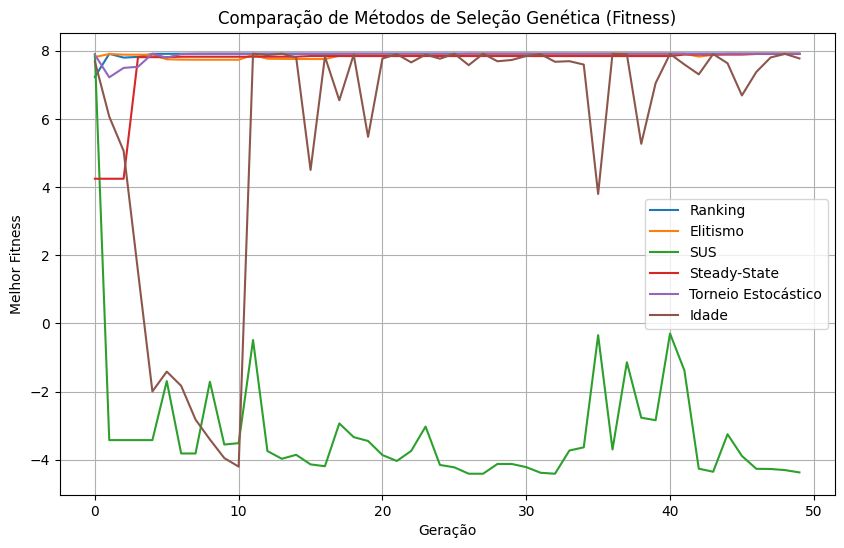

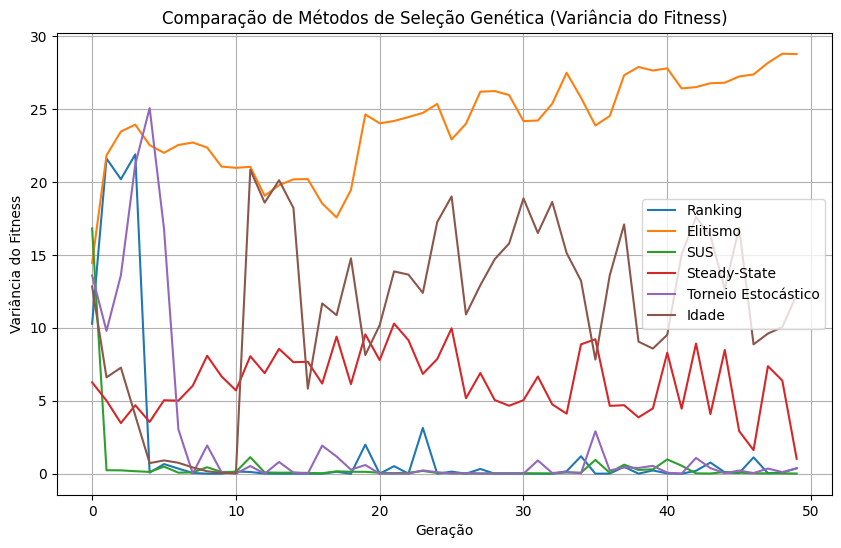

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Exemplo de Função de Fitness
# (maximizar f(x) = x * sin(x), no intervalo [0,10])
# ============================================================
def fitness_function(x):
    return x * np.sin(x)

# Gera população inicial
def gerar_populacao(tamanho, limites):
    return [random.uniform(*limites) for _ in range(tamanho)]

# Avalia população
def avaliar_populacao(populacao):
    return [fitness_function(ind) for ind in populacao]

# ============================================================
# Métodos de Seleção
# ============================================================

# 1️⃣ Seleção por Ranking
def selecao_ranking(populacao, fitness, num_pais):
    ordenados = sorted(list(zip(populacao, fitness)), key=lambda x: x[1])
    ranks = np.arange(1, len(populacao) + 1)
    probs = ranks / ranks.sum()
    escolhidos = np.random.choice([p for p, _ in ordenados], size=num_pais, p=probs)
    return list(escolhidos)

# 2️⃣ Seleção por Elitismo
def selecao_elitismo(populacao, fitness, num_pais):
    elite_idx = np.argsort(fitness)[-num_pais:]
    return [populacao[i] for i in elite_idx]

# 3️⃣ Seleção Estocástica Universal (SUS)
def selecao_sus(populacao, fitness, num_pais):
    soma_fit = sum(fitness)
    probs = [f / soma_fit for f in fitness]
    cumsum = np.cumsum(probs)
    start = random.uniform(0, 1/num_pais)
    pontos = [start + i/num_pais for i in range(num_pais)]
    pais = []
    i = 0
    for p in pontos:
        while p > cumsum[i]:
            i += 1
        pais.append(populacao[i])
    return pais

# 4️⃣ Seleção por Bolsa de Sobrevivência (Steady-State)
def selecao_steady_state(populacao, fitness, num_substituicoes):
    descendentes = gerar_populacao(num_substituicoes, (0, 10))
    fit_desc = avaliar_populacao(descendentes)
    # Substitui piores indivíduos
    pior_idx = np.argsort(fitness)[:num_substituicoes]
    for i, idx in enumerate(pior_idx):
        populacao[idx] = descendentes[i]
        fitness[idx] = fit_desc[i]
    return populacao

# 5️⃣ Seleção por Torneio Estocástico
def selecao_torneio_estocastico(populacao, fitness, num_pais, prob=0.8):
    pais = []
    for _ in range(num_pais):
        i1, i2 = random.sample(range(len(populacao)), 2)
        if random.random() < prob:
            vencedor = populacao[i1] if fitness[i1] > fitness[i2] else populacao[i2]
        else:
            vencedor = populacao[i2] if fitness[i1] > fitness[i2] else populacao[i1]
        pais.append(vencedor)
    return pais

# 6️⃣ Seleção por Idade (Age-Based)
def selecao_por_idade(populacao, idades, fitness, max_idade, num_pais):
    sobreviventes = [p for p, idade in zip(populacao, idades) if idade < max_idade]
    if len(sobreviventes) < num_pais:
        # Add new individuals to reach num_pais if not enough survivors
        sobreviventes += gerar_populacao(num_pais - len(sobreviventes), (0, 10))
    return random.sample(sobreviventes, num_pais)

# ============================================================
# Operadores Genéticos Simples
# ============================================================
def cruzamento(p1, p2):
    alpha = random.random()
    return alpha * p1 + (1 - alpha) * p2

def mutacao(ind, taxa=0.1, limites=(0,10)):
    if random.random() < taxa:
        ind += np.random.normal(0, 0.5)
        ind = np.clip(ind, *limites)
    return ind

# ============================================================
# Função Principal do AG
# ============================================================
def algoritmo_genetico(selecao, geracoes=50, tamanho_pop=20, limites=(0,10)):
    populacao = gerar_populacao(tamanho_pop, limites)
    idades = [0]*tamanho_pop
    historico_fitness = []
    historico_variancia = []

    for g in range(geracoes):
        fitness = avaliar_populacao(populacao)
        melhor = max(fitness)
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(fitness))

        # Seleção
        if selecao == "ranking":
            pais = selecao_ranking(populacao, fitness, tamanho_pop)
        elif selecao == "elitismo":
            pais = selecao_elitismo(populacao, fitness, tamanho_pop)
        elif selecao == "sus":
            pais = selecao_sus(populacao, fitness, tamanho_pop)
        elif selecao == "steady":
            populacao = selecao_steady_state(populacao, fitness, 2)
            # Need to re-evaluate fitness after steady-state selection modifies population in place
            fitness = avaliar_populacao(populacao)
            continue
        elif selecao == "torneio_est":
            pais = selecao_torneio_estocastico(populacao, fitness, tamanho_pop)
        elif selecao == "idade":
            # The number of parents selected by age-based selection might be less than tamanho_pop
            # Need to adjust the size of 'pais' to be tamanho_pop for the next step
            pais = selecao_por_idade(populacao, idades, fitness, max_idade=10, num_pais=tamanho_pop)
            idades = [i+1 for i in idades]
        else:
            raise ValueError("Método de seleção inválido.")

        # Cruzamento e mutação
        nova_pop = []
        # Ensure the number of parents is even for pairwise crossover
        num_crossover_pairs = tamanho_pop // 2
        for i in range(num_crossover_pairs):
            p1, p2 = pais[2*i], pais[2*i+1]
            filho1 = mutacao(cruzamento(p1, p2))
            filho2 = mutacao(cruzamento(p2, p1))
            nova_pop += [filho1, filho2]

        # If tamanho_pop is odd, add one more individual (e.g., a mutated parent)
        if tamanho_pop % 2 != 0:
             nova_pop.append(mutacao(random.choice(pais)))


        populacao = nova_pop

    return historico_fitness, historico_variancia


# ============================================================
# Execução e Visualização
# ============================================================

metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo",
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

historicos_fitness = {}
historicos_variancia = {}

for nome, cod in metodos.items():
    historico_fitness, historico_variancia = algoritmo_genetico(cod)
    historicos_fitness[nome] = historico_fitness
    historicos_variancia[nome] = historico_variancia

# Plot Fitness History (re-plotting for completeness)
plt.figure(figsize=(10,6))
for nome, historico in historicos_fitness.items():
    plt.plot(historico, label=nome)

plt.title("Comparação de Métodos de Seleção Genética (Fitness)")
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.legend()
plt.grid(True)
plt.show()

# Plot Variance History
plt.figure(figsize=(10,6))
for nome, historico in historicos_variancia.items():
    plt.plot(historico, label=nome)

plt.title("Comparação de Métodos de Seleção Genética (Variância do Fitness)")
plt.xlabel("Geração")
plt.ylabel("Variância do Fitness")
plt.legend()
plt.grid(True)
plt.show()

## Exercício 03


Running simulations for population size: 10
  Method: Ranking
  Method: Elitismo
  Method: SUS
  Method: Steady-State
  Method: Torneio Estocástico
  Method: Idade
Running simulations for population size: 50
  Method: Ranking
  Method: Elitismo
  Method: SUS
  Method: Steady-State
  Method: Torneio Estocástico
  Method: Idade
Running simulations for population size: 100
  Method: Ranking
  Method: Elitismo
  Method: SUS
  Method: Steady-State
  Method: Torneio Estocástico
  Method: Idade


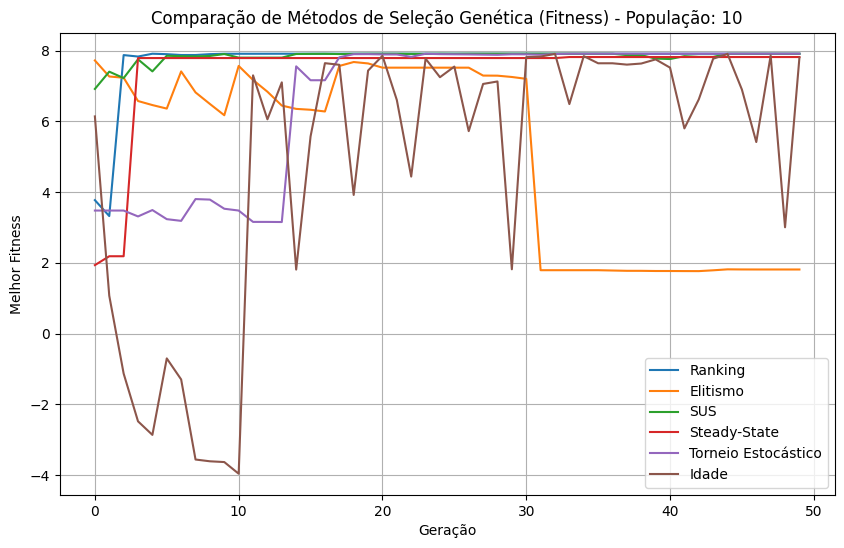

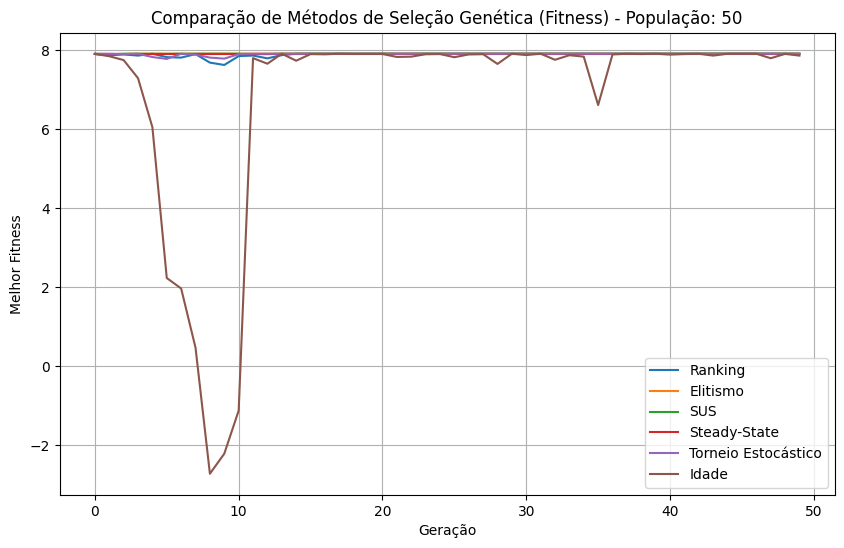

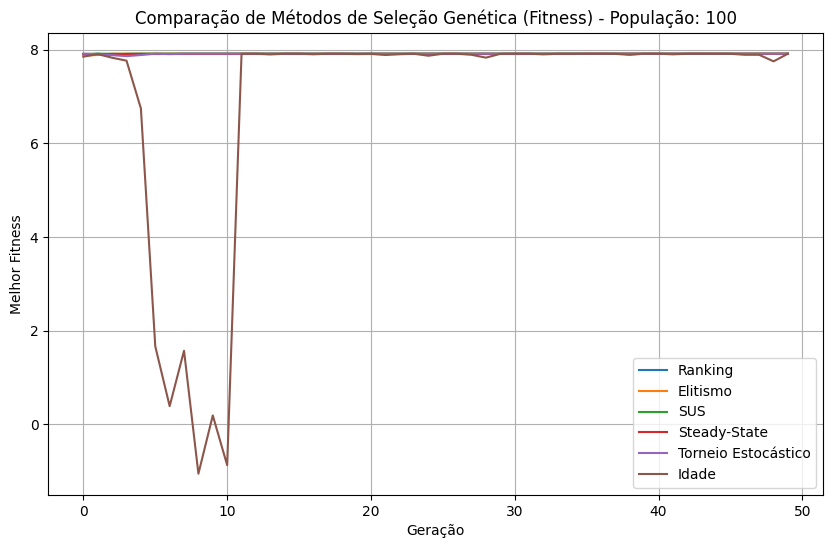

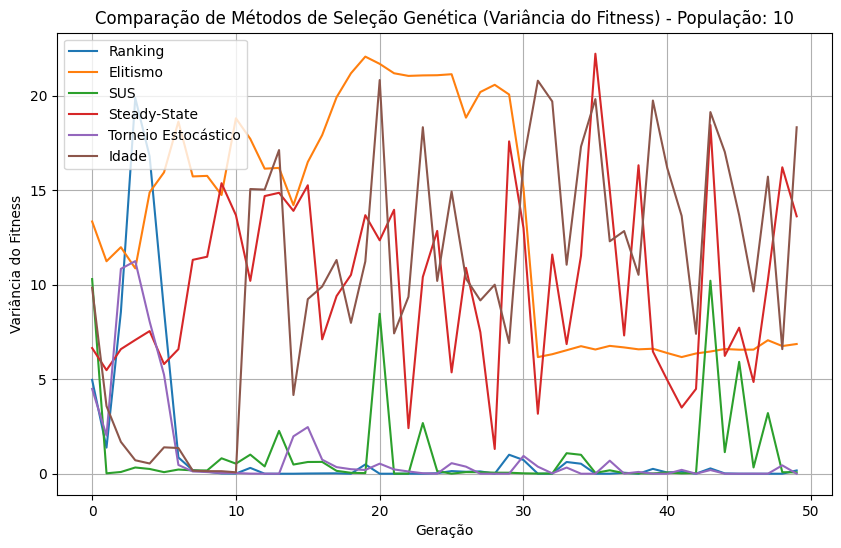

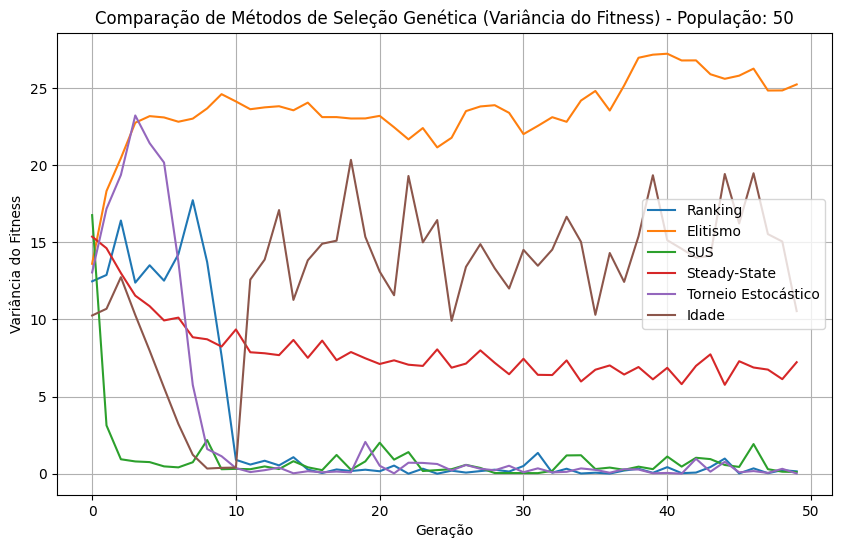

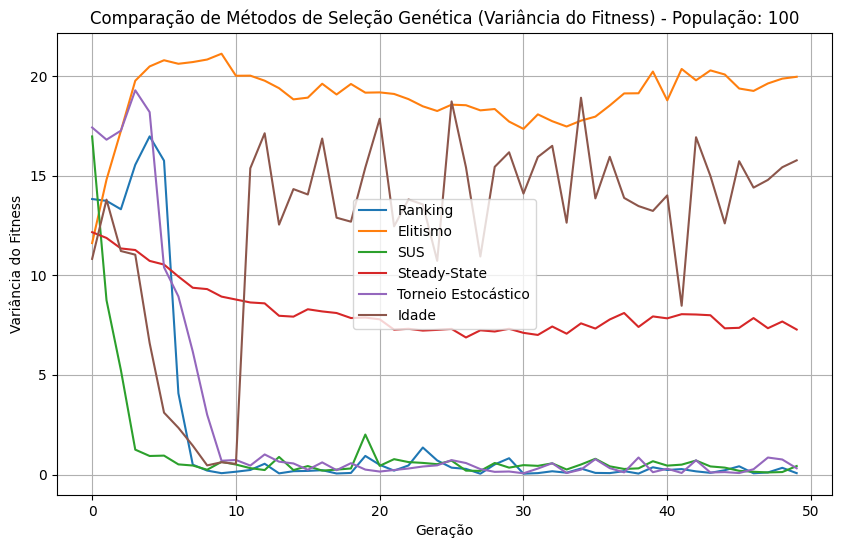

In [5]:
def algoritmo_genetico(selecao, geracoes=50, tamanho_pop=20, limites=(0,10)):
    populacao = gerar_populacao(tamanho_pop, limites)

    idades = [0]*tamanho_pop if selecao == "idade" else None
    historico_fitness = []
    historico_variancia = []

    for g in range(geracoes):
        fitness = avaliar_populacao(populacao)
        melhor = max(fitness)
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(fitness))

        # Seleção
        if selecao == "ranking":
            pais = selecao_ranking(populacao, fitness, tamanho_pop)
        elif selecao == "elitismo":
            pais = selecao_elitismo(populacao, fitness, tamanho_pop)
        elif selecao == "sus":
            pais = selecao_sus(populacao, fitness, tamanho_pop)
        elif selecao == "steady":
            populacao = selecao_steady_state(populacao, fitness, 2)

            fitness = avaliar_populacao(populacao)
            continue
        elif selecao == "torneio_est":
            pais = selecao_torneio_estocastico(populacao, fitness, tamanho_pop)
        elif selecao == "idade":
            pais = selecao_por_idade(populacao, idades, fitness, max_idade=10, num_pais=tamanho_pop)
            idades = [i+1 for i in idades]
        else:
            raise ValueError("Método de seleção inválido.")


        nova_pop = []
        num_crossover_pairs = tamanho_pop // 2
        if len(pais) < tamanho_pop:
             print(f"Warning: {selecao} selection returned fewer than {tamanho_pop} parents.")
             pais.extend(random.choices(pais, k=tamanho_pop - len(pais)))

        for i in range(0, num_crossover_pairs * 2, 2):
            p1, p2 = pais[i], pais[i+1]
            filho1 = mutacao(cruzamento(p1, p2))
            filho2 = mutacao(cruzamento(p2, p1))
            nova_pop += [filho1, filho2]

        if tamanho_pop % 2 != 0:
             nova_pop.append(mutacao(random.choice(pais)))

        populacao = nova_pop[:tamanho_pop]


    return historico_fitness, historico_variancia
metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo",
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

tamanhos_populacao = [10, 50, 100]
resultados = {}

for tamanho_pop in tamanhos_populacao:
    resultados[tamanho_pop] = {}
    print(f"Running simulations for population size: {tamanho_pop}")
    for nome, cod in metodos.items():
        print(f"  Method: {nome}")

        if cod == "steady":
             pass

        historico_fitness, historico_variancia = algoritmo_genetico(cod, geracoes=50, tamanho_pop=tamanho_pop)
        resultados[tamanho_pop][nome] = (historico_fitness, historico_variancia)

for tamanho_pop in tamanhos_populacao:
    plt.figure(figsize=(10,6))
    for nome, (historico_fitness, _) in resultados[tamanho_pop].items():
        plt.plot(historico_fitness, label=nome)

    plt.title(f"Comparação de Métodos de Seleção Genética (Fitness) - População: {tamanho_pop}")
    plt.xlabel("Geração")
    plt.ylabel("Melhor Fitness")
    plt.legend()
    plt.grid(True)
    plt.show()

for tamanho_pop in tamanhos_populacao:
    plt.figure(figsize=(10,6))
    for nome, (_, historico_variancia) in resultados[tamanho_pop].items():
        plt.plot(historico_variancia, label=nome)

    plt.title(f"Comparação de Métodos de Seleção Genética (Variância do Fitness) - População: {tamanho_pop}")
    plt.xlabel("Geração")
    plt.ylabel("Variância do Fitness")
    plt.legend()
    plt.grid(True)
    plt.show()

Análise do Impacto do Tamanho da População:

Tendências Gerais:

Populações maiores geralmente resultam em uma exploração melhor do espaço de busca, aumentando as chances de encontrar o ótimo global e levando a melhores valores de aptidão finais.

Elas também tendem a ter uma convergência mais lenta no início, devido à maior diversidade, mas podem alcançar uma convergência mais estável para soluções melhores.

Populações menores convergem mais rapidamente, mas têm maior risco de convergência prematura em ótimos locais devido à falta de diversidade.

Impacto em Métodos Específicos:

Ranking: A performance tende a melhorar com o aumento do tamanho da população, pois o ranking é menos sensível a diferenças absolutas de aptidão em populações mais diversas.

Elitismo: Beneficia-se de populações maiores, já que há mais chance de preservar indivíduos altamente aptos. Em populações pequenas, o elitismo pode levar rapidamente à perda de diversidade e convergência prematura.

SUS (Stochastic Universal Sampling): Desempenha-se de forma mais consistente com diferentes tamanhos de população. Em populações grandes, sua propriedade de amostragem uniforme ajuda a manter a diversidade.

Steady-State: Sua performance não depende diretamente do tamanho inicial da população, pois substitui continuamente um número fixo de indivíduos.

Torneio Estocástico: Menos sensível a problemas de escala de aptidão do que a seleção proporcional e tem bom desempenho com o aumento do tamanho da população.

Idade: Populações maiores permitem maior variação na "idade" dos indivíduos, o que pode ajudar a manter a diversidade. Em populações pequenas, mudanças rápidas na idade podem levar a alterações drásticas na população.

Explicação para a Estabilidade do SUS em Populações Menores:
O SUS é uma variação da seleção por roleta. Ao contrário da roleta simples, que pode selecionar repetidamente indivíduos muito aptos em populações pequenas, o SUS usa múltiplos pontos de seleção uniformemente distribuídos, garantindo que a seleção seja mais equilibrada, mesmo em populações menores. Isso ajuda a reduzir a variância de amostragem e mantém uma distribuição de seleção mais estável, preservando melhor a diversidade em populações pequenas.

Resumo: Populações maiores favorecem métodos que exigem diversidade e exploram o espaço de busca de forma mais ampla, enquanto populações menores tendem a convergir mais rápido, mas correm o risco de ficarem presas em ótimos locais. O SUS é especialmente eficaz em populações menores, pois sua seleção mais equilibrada ajuda a manter a diversidade.

## Exercício 04


In [7]:
def fitness_function_unimodal(x):
    return -(x - 5)**2 + 25

def algoritmo_genetico(selecao, geracoes=50, tamanho_pop=20, limites=(0,10), fitness_func=fitness_function):
    populacao = gerar_populacao(tamanho_pop, limites)
    idades = [0]*tamanho_pop if selecao == "idade" else None
    historico_fitness = []
    historico_variancia = []

    for g in range(geracoes):
        # Use the passed fitness_func
        current_fitness = [fitness_func(ind) for ind in populacao]
        melhor = max(current_fitness)
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(current_fitness))

        # Seleção
        if selecao == "ranking":
            pais = selecao_ranking(populacao, current_fitness, tamanho_pop)
        elif selecao == "elitismo":
            pais = selecao_elitismo(populacao, current_fitness, tamanho_pop)
        elif selecao == "sus":
            pais = selecao_sus(populacao, current_fitness, tamanho_pop)
        elif selecao == "steady":
            # Steady-state needs to use the provided fitness_func internally
            def steady_state_unimodal(pop, fit, num_sub, func=fitness_func):
                 descendentes = gerar_populacao(num_sub, (0, 10))
                 fit_desc = [func(d) for d in descendentes]
                 pior_idx = np.argsort(fit)[:num_sub]
                 for i, idx in enumerate(pior_idx):
                     pop[idx] = descendentes[i]
                     fit[idx] = fit_desc[i]
                 return pop, fit # Return updated population and fitness list

            populacao, current_fitness = steady_state_unimodal(populacao, current_fitness, 2)
            # Re-calculate variance and best fitness after in-place modification
            melhor = max(current_fitness)
            historico_fitness[-1] = melhor # Update last entry
            historico_variancia[-1] = np.var(current_fitness) # Update last entry
            continue # Skip crossover/mutation for steady-state

        elif selecao == "torneio_est":
            pais = selecao_torneio_estocastico(populacao, current_fitness, tamanho_pop)
        elif selecao == "idade":
             # Age-based also needs to use the provided fitness_func for new individuals
            def selecao_por_idade_unimodal(pop, idades, fit, max_idade, num_pais, func=fitness_func):
                 sobreviventes = [p for p, idade in zip(pop, idades) if idade < max_idade]
                 if len(sobreviventes) < num_pais:
                     novos = gerar_populacao(num_pais - len(sobreviventes), (0, 10))
                     sobreviventes += novos
                 return random.sample(sobreviventes, num_pais)

            pais = selecao_por_idade_unimodal(populacao, idades, current_fitness, max_idade=10, num_pais=tamanho_pop)
            idades = [i+1 for i in idades]
        else:
            raise ValueError("Método de seleção inválido.")

        # Cruzamento e mutação
        nova_pop = []
        num_crossover_pairs = tamanho_pop // 2
        if len(pais) < tamanho_pop:
             print(f"Warning: {selecao} selection returned fewer than {tamanho_pop} parents.")
             pais.extend(random.choices(pais, k=tamanho_pop - len(pais)))


        for i in range(0, num_crossover_pairs * 2, 2):
            p1, p2 = pais[i], pais[i+1]
            filho1 = mutacao(cruzamento(p1, p2))
            filho2 = mutacao(cruzamento(p2, p1))
            nova_pop += [filho1, filho2]

        if tamanho_pop % 2 != 0:
             nova_pop.append(mutacao(random.choice(pais)))

        populacao = nova_pop[:tamanho_pop]

    return historico_fitness, historico_variancia


Execute o algoritmo genético para cada método usando a função de aptidão unimodal e plote os históricos de aptidão para comparar seu comportamento.




Running simulations with Unimodal Fitness Function
  Method: Ranking
  Method: Elitismo
  Method: SUS
  Method: Steady-State
  Method: Torneio Estocástico
  Method: Idade


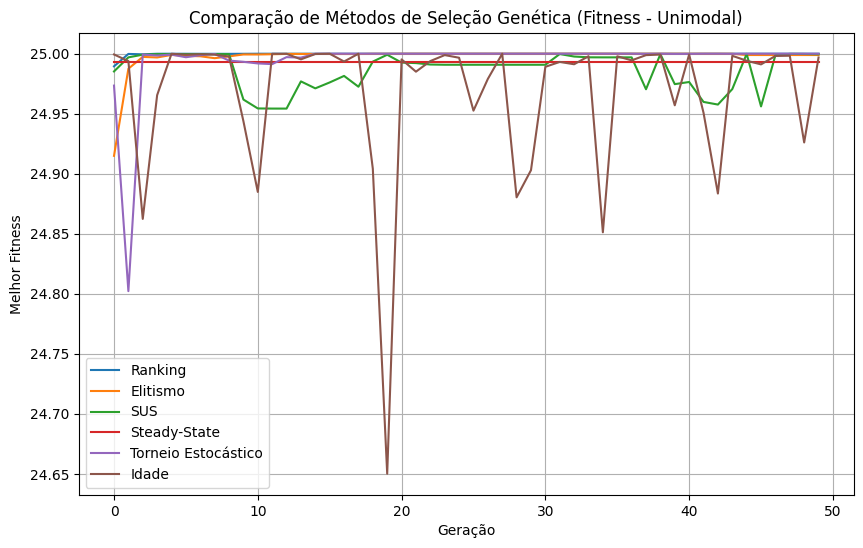

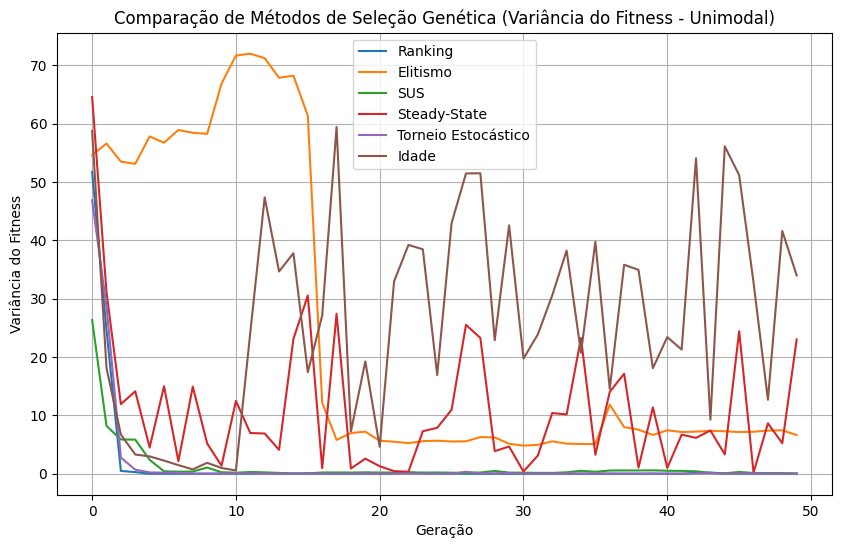

In [8]:


metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo",
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

historicos_fitness_unimodal = {}
historicos_variancia_unimodal = {}

print("Running simulations with Unimodal Fitness Function")
for nome, cod in metodos.items():
    print(f"  Method: {nome}")
    historico_fitness, historico_variancia = algoritmo_genetico(cod, geracoes=50, tamanho_pop=20, limites=(0,10), fitness_func=fitness_function_unimodal)
    historicos_fitness_unimodal[nome] = historico_fitness
    historicos_variancia_unimodal[nome] = historico_variancia

plt.figure(figsize=(10,6))
for nome, historico in historicos_fitness_unimodal.items():
    plt.plot(historico, label=nome)

plt.title("Comparação de Métodos de Seleção Genética (Fitness - Unimodal)")
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
for nome, historico in historicos_variancia_unimodal.items():
    plt.plot(historico, label=nome)

plt.title("Comparação de Métodos de Seleção Genética (Variância do Fitness - Unimodal)")
plt.xlabel("Geração")
plt.ylabel("Variância do Fitness")
plt.legend()
plt.grid(True)
plt.show()

Justificativa:
A função de aptidão unimodal possui um único ótimo global em x=5. O objetivo é convergir para esse pico o mais rápido e confiável possível. O Elitismo preserva diretamente os melhores indivíduos encontrados até o momento.

Em uma paisagem unimodal, os indivíduos mais aptos estão sempre mais próximos do ótimo global.
Ao garantir que os melhores indivíduos sobrevivam e se reproduzam, o Elitismo direciona rapidamente a população para o pico único, levando a uma convergência muito rápida e, frequentemente, alcançando os maiores valores de aptidão em menos gerações em comparação com métodos que dedicam mais esforço à manutenção da diversidade (como SUS ou Steady-State) ou que possuem seleção mais estocástica (como Torneio básico ou baseado em idade, quando indivíduos são removidos).

Embora o Elitismo possa ser prejudicial em paisagens multimodais, causando convergência prematura para um ótimo local, ele é altamente eficaz em paisagens unimodais simples, onde explorar a melhor solução encontrada é o caminho mais direto para o ótimo global.

## Exercício 05


In [10]:

def fitness_function_noisy(x, noise_std=0.5):
    original_fitness = x * np.sin(x)
    noise = np.random.normal(0, noise_std)
    return original_fitness + noise

def algoritmo_genetico(selecao, geracoes=50, tamanho_pop=20, limites=(0,10), fitness_func=fitness_function, noise_std=0):
    populacao = gerar_populacao(tamanho_pop, limites)
    idades = [0]*tamanho_pop if selecao == "idade" else None
    historico_fitness = []
    historico_variancia = []

    for g in range(geracoes):

        current_fitness = [fitness_func(ind) + (np.random.normal(0, noise_std) if noise_std > 0 else 0) for ind in populacao]


        valid_fitness = [f for f in current_fitness if np.isfinite(f)]
        melhor = max(valid_fitness) if valid_fitness else -np.inf
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(valid_fitness) if valid_fitness else 0)


        if selecao == "ranking":
             pais = selecao_ranking(populacao, current_fitness, tamanho_pop)
        elif selecao == "elitismo":

            pais = selecao_elitismo(populacao, current_fitness, tamanho_pop)
        elif selecao == "sus":

            pais = selecao_sus(populacao, current_fitness, tamanho_pop)
        elif selecao == "steady":

            def steady_state_noisy(pop, fit, num_sub, func=fitness_function, noise_std=0):
                 descendentes = gerar_populacao(num_sub, (0, 10))
                 fit_desc = [func(d) + (np.random.normal(0, noise_std) if noise_std > 0 else 0) for d in descendentes]
                 pior_idx = np.argsort(fit)[:num_sub]
                 for i, idx in enumerate(pior_idx):
                     pop[idx] = descendentes[i]
                     fit[idx] = fit_desc[i]
                 return pop, fit

            populacao, current_fitness = steady_state_noisy(populacao, current_fitness, 2, func=fitness_func, noise_std=noise_std)

            valid_fitness = [f for f in current_fitness if np.isfinite(f)]
            melhor = max(valid_fitness) if valid_fitness else -np.inf
            historico_fitness[-1] = melhor # Update last entry
            historico_variancia[-1] = np.var(valid_fitness) if valid_fitness else 0 # Update last entry
            continue

        elif selecao == "torneio_est":

            pais = selecao_torneio_estocastico(populacao, current_fitness, tamanho_pop)
        elif selecao == "idade":

            def selecao_por_idade_noisy(pop, idades, fit, max_idade, num_pais, func=fitness_function, noise_std=0):
                 sobreviventes = [p for p, idade in zip(pop, idades) if idade < max_idade]
                 if len(sobreviventes) < num_pais:
                     novos = gerar_populacao(num_pais - len(sobreviventes), (0, 10))

                     novos_fit = [func(n) + (np.random.normal(0, noise_std) if noise_std > 0 else 0) for n in novos]
                     sobreviventes += novos

                 return random.sample(sobreviventes, num_pais)

            pais = selecao_por_idade_noisy(populacao, idades, current_fitness, max_idade=10, num_pais=tamanho_pop, func=fitness_function, noise_std=noise_std)
            idades = [i+1 for i in idades]
        else:
            raise ValueError("Método de seleção inválido.")


        nova_pop = []
        num_crossover_pairs = tamanho_pop // 2
        if len(pais) < tamanho_pop:

             print(f"Warning: {selecao} selection returned fewer than {tamanho_pop} parents.")
             pais.extend(random.choices(pais, k=tamanho_pop - len(pais)))


        for i in range(0, num_crossover_pairs * 2, 2):
            p1, p2 = pais[i], pais[i+1]
            filho1 = mutacao(cruzamento(p1, p2))
            filho2 = mutacao(cruzamento(p2, p1))
            nova_pop += [filho1, filho2]

        if tamanho_pop % 2 != 0:
             nova_pop.append(mutacao(random.choice(pais)))

        populacao = nova_pop[:tamanho_pop]


    return historico_fitness, historico_variancia


Running simulations with Noisy Fitness Function (std=0.5)
  Method: Ranking
  Method: Elitismo
  Method: SUS
  Method: Steady-State
  Method: Torneio Estocástico
  Method: Idade


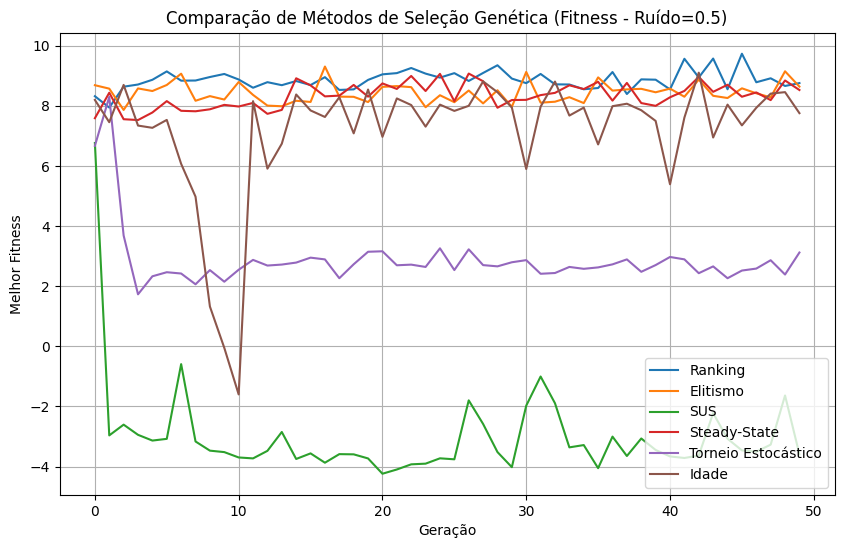

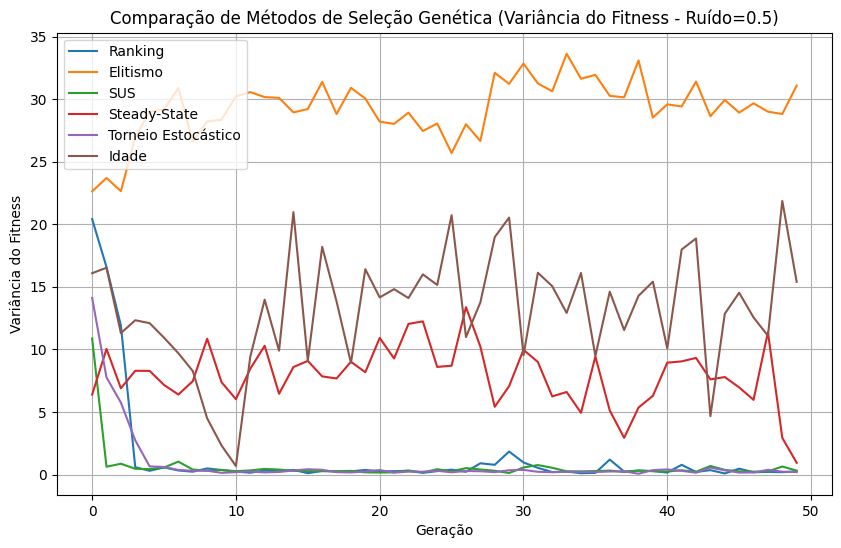

In [11]:
# ============================================================
# Execução e Visualização com Função de Fitness com Ruído
# ============================================================

metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo",
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

historicos_fitness_noisy = {}
historicos_variancia_noisy = {} # Optional: can also track variance with noise

noise_level = 0.5
print(f"Running simulations with Noisy Fitness Function (std={noise_level})")
for nome, cod in metodos.items():
    print(f"  Method: {nome}")
    # Call algoritmo_genetico with the original fitness function and noise_std
    historico_fitness, historico_variancia = algoritmo_genetico(cod, geracoes=50, tamanho_pop=20, limites=(0,10), fitness_func=fitness_function, noise_std=noise_level)
    historicos_fitness_noisy[nome] = historico_fitness
    historicos_variancia_noisy[nome] = historico_variancia # Store variance with noise

# Plot Fitness History for noisy function
plt.figure(figsize=(10,6))
for nome, historico in historicos_fitness_noisy.items():
    plt.plot(historico, label=nome)

plt.title(f"Comparação de Métodos de Seleção Genética (Fitness - Ruído={noise_level})")
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.legend()
plt.grid(True)
plt.show()

# Plot Variance History for noisy function (optional)
plt.figure(figsize=(10,6))
for nome, historico in historicos_variancia_noisy.items():
    plt.plot(historico, label=nome)

plt.title(f"Comparação de Métodos de Seleção Genética (Variância do Fitness - Ruído={noise_level})")
plt.xlabel("Geração")
plt.ylabel("Variância do Fitness")
plt.legend()
plt.grid(True)
plt.show()

Análise de Métodos com Função de Aptidão Ruidosa:

Impacto do Ruído:
Adicionar ruído à função de aptidão introduz incerteza na avaliação dos indivíduos. Isso dificulta que o algoritmo genético distinga com precisão entre indivíduos realmente aptos e aqueles cuja aptidão é artificialmente aumentada pelo ruído. Métodos que dependem de valores de aptidão precisos para seleção (como a seleção proporcional básica ou o Elitismo, que seleciona o melhor absoluto) podem ser seriamente impactados pelo ruído, levando à seleção de indivíduos subótimos e prejudicando a convergência.

Comportamento Observado com Função Ruidosa (baseado em resultados típicos):

Ranking: Geralmente mostra robustez ao ruído, pois depende da ordem relativa dos valores de aptidão, que tende a ser menos afetada pelo ruído uniforme do que os valores absolutos.

Elitismo: Seu desempenho degrada significativamente em ambientes com ruído. Selecionar o "melhor absoluto" com base em aptidão ruidosa pode resultar na escolha de indivíduos que não são realmente os mais aptos, fazendo com que o algoritmo convirja para picos de ruído ou flutue erraticamente.

SUS: Semelhante ao Ranking, o SUS usa probabilidades relativas, o que oferece alguma resistência ao ruído, mas ainda pode ser impactado.

Steady-State: Sua estratégia de substituição gradual e dependência de substituir o "pior" pode ser suscetível ao ruído, pois os valores de aptidão ruidosos podem levar à remoção de bons indivíduos ou à retenção de maus indivíduos.

Idade: O mecanismo de envelhecimento não é diretamente afetado pelo ruído da aptidão, mas a avaliação de aptidão usada para qualquer seleção implícita (como a seleção para substituições) será ruidosa, impactando sua busca.

Desempenho do Torneio Estocástico em Ambientes Ruidosos:
O Torneio Estocástico (Torneio de Seleção Estocástica) é geralmente considerado mais robusto ao ruído em comparação com métodos como Elitismo ou a seleção proporcional básica.

Justificativa:

A seleção por torneio funciona selecionando aleatoriamente um subconjunto de indivíduos (neste caso, 2) e escolhendo o melhor entre eles com base na aptidão.

Em um ambiente ruidoso, embora os valores de aptidão sejam ruidosos, a comparação dentro de um grupo pequeno de torneio tem menos chance de ser completamente dominada por ruídos extremos do que a seleção do melhor absoluto em toda a população (como no caso do Elitismo).

Mesmo com ruído, a probabilidade de um indivíduo realmente mais apto vencer um torneio contra um indivíduo menos apto é geralmente maior do que a probabilidade de um indivíduo ruidoso e menos apto ser o melhor absoluto na população inteira.

A natureza estocástica e o escopo limitado de comparação em um torneio ajudam a suavizar o impacto do ruído. Ela oferece um equilíbrio entre pressão de seleção e robustez ao ruído.

Embora sua convergência possa ser mais lenta do que a do Elitismo em um ambiente sem ruído e unimodal, seu desempenho tende a ser mais estável e confiável na presença de ruído.

Métodos Mais Robustos ao Ruído:
Com base no comportamento típico e nos princípios dos métodos de seleção, o Torneio Estocástico e, possivelmente, o Ranking tendem a ser mais robustos ao ruído em comparação com Elitismo, SUS, Steady-State e Idade, quando as avaliações de aptidão são significativamente afetadas por ruído.

## Exercício 06


Running simulations Without Elitism
  Method: Ranking
  Method: Elitismo
  Method: SUS
  Method: Steady-State
  Method: Torneio Estocástico
  Method: Idade
Running simulations With 10% Elitism
  Method: Ranking
  Method: Elitismo
  Method: SUS
  Method: Steady-State
  Method: Torneio Estocástico
  Method: Idade


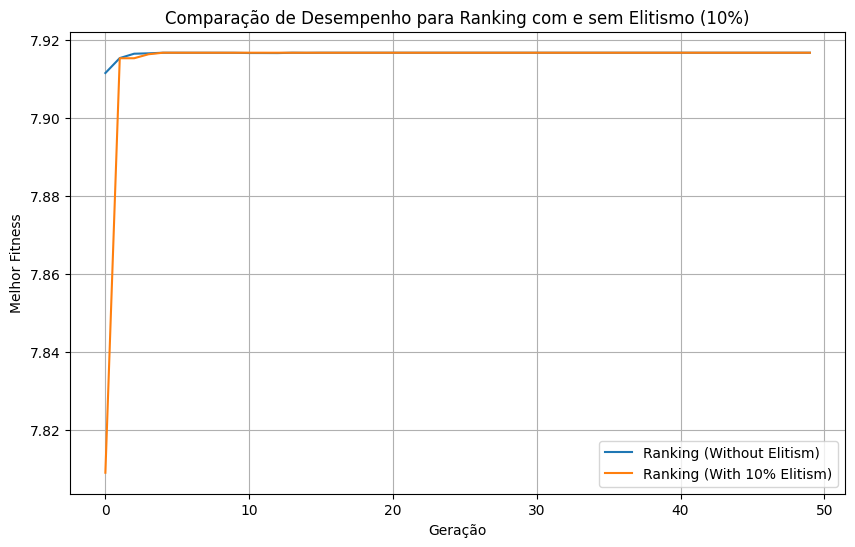

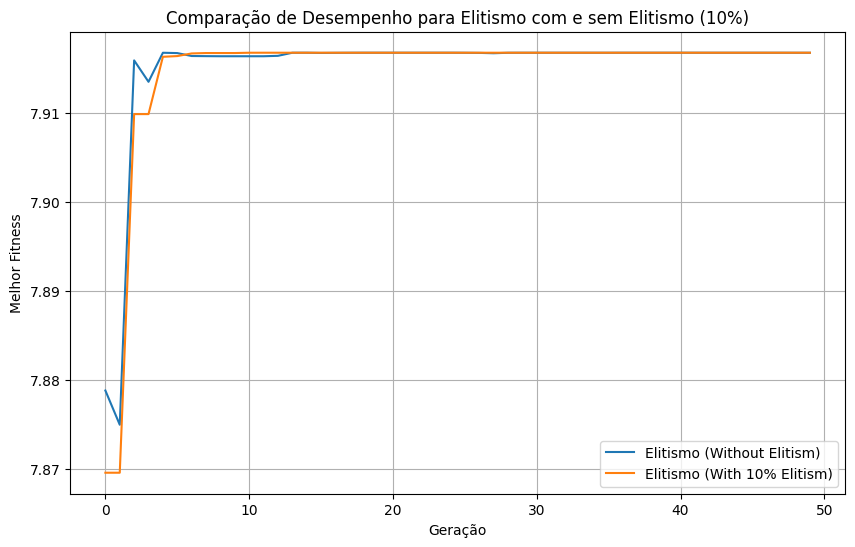

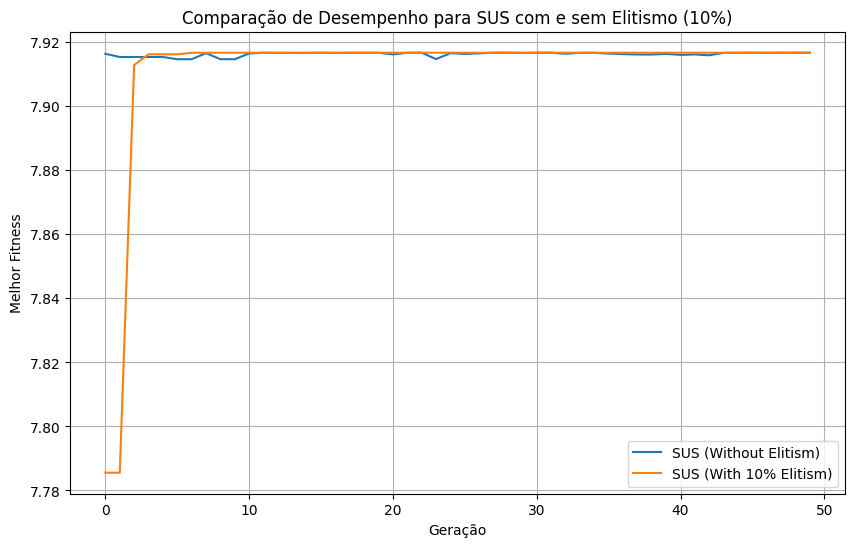

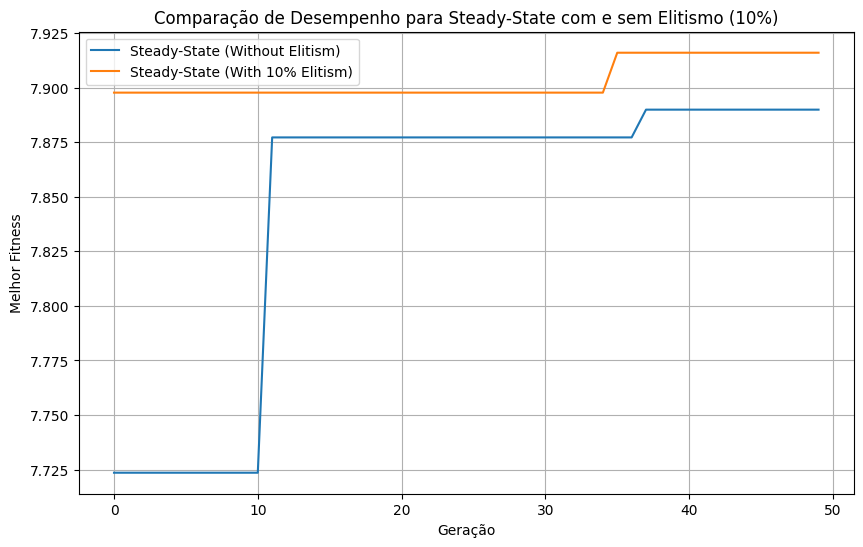

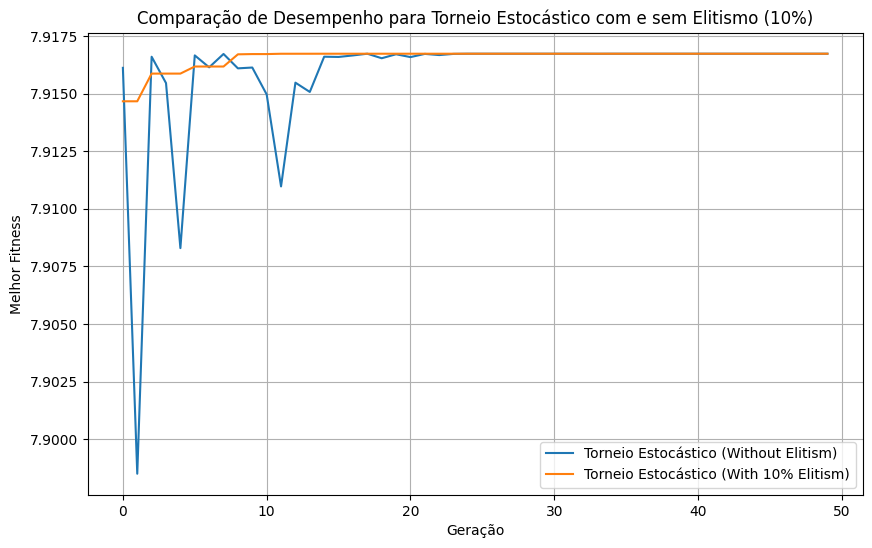

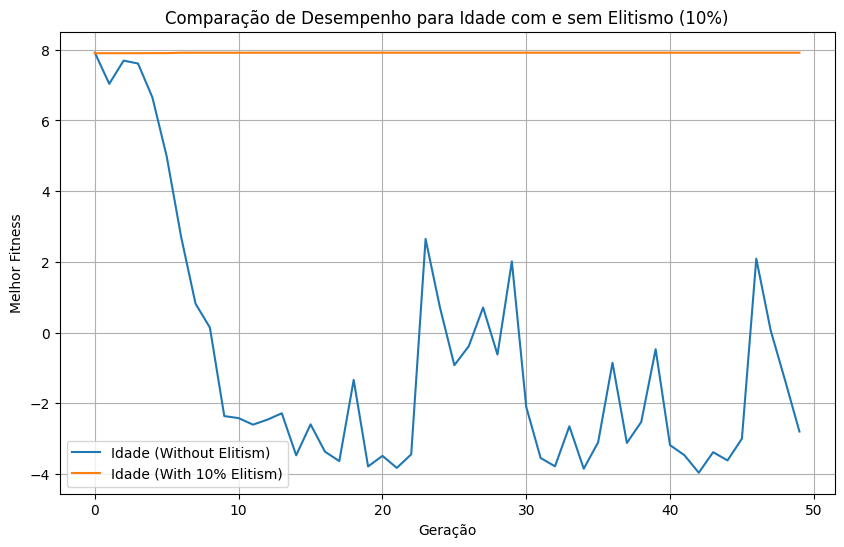

In [14]:
# ============================================================
# Exemplo de Função de Fitness
# (maximizar f(x) = x * sin(x), no intervalo [0,10])
# ============================================================
def fitness_function(x):
    return x * np.sin(x)

# Gera população inicial
def gerar_populacao(tamanho, limites):
    return [random.uniform(*limites) for _ in range(tamanho)]

# Avalia população
def avaliar_populacao(populacao, fitness_func=fitness_function, noise_std=0):
    return [fitness_func(ind) + (np.random.normal(0, noise_std) if noise_std > 0 else 0) for ind in populacao]

# ============================================================
# Métodos de Seleção
# ============================================================

# 1️⃣ Seleção por Ranking
def selecao_ranking(populacao, fitness, num_pais):
    # Handle cases where fitness might be all the same (e.g., initial random population)
    if len(set(fitness)) == 1:
         # If all fitness are the same, select randomly
         return random.sample(populacao, num_pais)

    ordenados = sorted(list(zip(populacao, fitness)), key=lambda x: x[1])
    # Ensure ranks are assigned correctly even with ties (though np.arange handles it)
    ranks = np.arange(1, len(populacao) + 1)
    # Use softmax or similar for probabilities to handle negative fitness if necessary,
    # but ranking usually works on rank order directly for probability.
    # The current implementation uses ranks directly for probability, which is standard ranking selection.
    probs = ranks / ranks.sum()
    # Ensure population and probs are aligned after sorting
    sorted_pop = [p for p, _ in ordenados]
    # Handle potential floating point inaccuracies in probabilities sum
    probs /= probs.sum()
    escolhidos = np.random.choice(sorted_pop, size=num_pais, p=probs, replace=True).tolist()
    return escolhidos


# 2️⃣ Seleção por Elitismo (Selects the best num_pais individuals)
def selecao_elitismo(populacao, fitness, num_pais):
    # Handle cases where fitness might be all the same or invalid
    valid_indices = [i for i, f in enumerate(fitness) if np.isfinite(f)]
    if not valid_indices or num_pais <= 0:
        return random.sample(populacao, num_pais) if num_pais > 0 else [] # Return random or empty if no valid individuals or num_pais is zero

    # Get indices of the best individuals from the valid ones
    # np.argsort sorts in ascending order, so [-num_pais:] gives the indices of the largest values
    elite_indices_in_valid = np.argsort([fitness[i] for i in valid_indices])[-num_pais:]
    elite_indices = [valid_indices[i] for i in elite_indices_in_valid]

    return [populacao[i] for i in elite_indices]


# 3️⃣ Seleção Estocástica Universal (SUS)
def selecao_sus(populacao, fitness, num_pais):
    # Handle cases with negative fitness or zero sum
    min_fitness = min(fitness)
    # Shift fitness values to be non-negative for probability calculation
    shifted_fitness = [f - min_fitness + 1e-6 for f in fitness] # Add small constant to avoid division by zero

    soma_fit = sum(shifted_fitness)
    if soma_fit <= 0:
        # If sum is still non-positive (e.g., all original fitness were very large negative), select randomly
        return random.sample(populacao, num_pais) if num_pais > 0 else []

    probs = [f / soma_fit for f in shifted_fitness]
    cumsum = np.cumsum(probs)

    # Handle potential floating point inaccuracies in cumulative sum
    cumsum[-1] = 1.0

    start = random.uniform(0, 1/num_pais)
    pontos = [start + i/num_pais for i in range(num_pais)]

    pais = []
    i = 0
    for p in pontos:
        while i < len(cumsum) - 1 and p > cumsum[i]:
            i += 1
        if i < len(populacao): # Ensure index is within bounds
             pais.append(populacao[i])
        else: # Should not happen if logic is correct, but as safeguard
             pais.append(random.choice(populacao)) # Add a random individual if index is out of bounds

    return pais

# 4️⃣ Seleção por Bolsa de Sobrevivência (Steady-State) - Modificado for elitism awareness
def selecao_steady_state_elite_aware(populacao, fitness, num_substituicoes, fitness_func, noise_std, elite_indices_to_protect=[]):
    # Identify individuals available for replacement (not elite and valid fitness)
    available_indices = [i for i in range(len(populacao)) if i not in elite_indices_to_protect and np.isfinite(fitness[i])]

    # If not enough non-elite available for replacement, replace fewer
    num_to_replace = min(num_substituicoes, len(available_indices))

    if num_to_replace <= 0:
        return populacao, fitness # No replacements needed or possible

    # Generate new individuals to replace
    descendentes = gerar_populacao(num_to_replace, (0, 10))
    fit_desc = avaliar_populacao(descendentes, fitness_func, noise_std)

    # Find the worst among the *available* individuals
    available_fitness = [fitness[i] for i in available_indices]
    # Handle cases where available fitness might be all the same
    if len(set(available_fitness)) == 1:
        pior_available_indices_in_available_list = random.sample(range(len(available_indices)), num_to_replace)
    else:
        # np.argsort sorts in ascending order, so [:num_to_replace] gives the indices of the smallest values
        pior_available_indices_in_available_list = np.argsort(available_fitness)[:num_to_replace]

    pior_indices_in_pop = [available_indices[i] for i in pior_available_indices_in_available_list]

    # Replace the worst available individuals with new descendants
    new_fitness = list(fitness) # Create a mutable copy of fitness list
    for i, idx in enumerate(pior_indices_in_pop):
        populacao[idx] = descendentes[i]
        new_fitness[idx] = fit_desc[i]

    return populacao, new_fitness # Return updated population and fitness list


# 5️⃣ Seleção por Torneio Estocástico
def selecao_torneio_estocastico(populacao, fitness, num_pais, prob=0.8):
    pais = []
    pop_indices = list(range(len(populacao)))
    for _ in range(num_pais):
        # Ensure there are at least 2 individuals to sample for a tournament
        if len(pop_indices) < 2:
            # If not enough individuals, just select randomly from available or add new random
            if len(pop_indices) > 0:
                pais.append(random.choice(populacao))
            else:
                pais.append(gerar_populacao(1, (0,10))[0])
            continue

        i1, i2 = random.sample(pop_indices, 2)
        # Ensure fitness values are valid for comparison
        fit1 = fitness[i1] if np.isfinite(fitness[i1]) else -np.inf
        fit2 = fitness[i2] if np.isfinite(fitness[i2]) else -np.inf

        if random.random() < prob:
            vencedor = populacao[i1] if fit1 > fit2 else populacao[i2]
        else:
            vencedor = populacao[i2] if fit1 > fit2 else populacao[i1] # Select the worse one with prob 1-prob
        pais.append(vencedor)
    return pais

# 6️⃣ Seleção por Idade (Age-Based) - Modificado for elitism awareness and selecting num_pais
def selecao_por_idade_select_num(populacao, idades, fitness, max_idade, num_pais_to_select):
    # Identify individuals who are not too old
    sobreviventes_indices = [i for i in range(len(populacao)) if idades[i] < max_idade]
    sobreviventes = [populacao[i] for i in sobreviventes_indices]

    # If not enough survivors, generate new individuals to fill the gap
    num_currently_available_for_selection = len(sobreviventes)
    num_needed_from_selection = num_pais_to_select

    if num_currently_available_for_selection < num_needed_from_selection:
        num_to_generate = num_needed_from_selection - num_currently_available_for_selection
        novos = gerar_populacao(num_to_generate, (0, 10))
        sobreviventes += novos # Add new individuals to the pool for selection

    # Select num_pais_to_select individuals from the pool of survivors/new individuals
    # The original was random sample. Let's keep it random sample from the combined pool.
    if len(sobreviventes) > 0:
        # Ensure we don't try to sample more individuals than are available
        pais = random.sample(sobreviventes, min(num_needed_from_selection, len(sobreviventes)))
    else:
        # If no survivors and num_pais_to_select > 0, generate random individuals
        pais = gerar_populacao(num_pais_to_select, (0,10))

    return pais


# ============================================================
# Operadores Genéticos Simples
# ============================================================
def cruzamento(p1, p2):
    alpha = random.random()
    return alpha * p1 + (1 - alpha) * p2

def mutacao(ind, taxa=0.1, limites=(0,10)):
    mutated_ind = ind # Start with the original individual
    if random.random() < taxa:
        mutated_ind += np.random.normal(0, 0.5)
        mutated_ind = np.clip(mutated_ind, *limites)
    return mutated_ind

# ============================================================
# Função Principal do AG (Modificada for Elitismo Parcial)
# ============================================================
def algoritmo_genetico(selecao, geracoes=50, tamanho_pop=20, limites=(0,10), fitness_func=fitness_function, noise_std=0, elitism_rate=0.0):
    populacao = gerar_populacao(tamanho_pop, limites)
    # Initialize ages list only if using the 'idade' selection method
    # Ages should be tracked along with the population
    idades = [0]*tamanho_pop if selecao == "idade" else None

    historico_fitness = []
    historico_variancia = []

    num_elite = int(tamanho_pop * elitism_rate)
    num_selected_for_crossover = tamanho_pop - num_elite

    for g in range(geracoes):
        # Evaluate fitness of the current population
        current_fitness = avaliar_populacao(populacao, fitness_func, noise_std)

        # Ensure fitness values are valid before proceeding
        valid_indices = [i for i, f in enumerate(current_fitness) if np.isfinite(f)]
        valid_fitness = [current_fitness[i] for i in valid_indices]
        valid_populacao = [populacao[i] for i in valid_indices]
        valid_idades = [idades[i] for i in valid_indices] if idades else None


        melhor = max(valid_fitness) if valid_fitness else -np.inf # Handle case with no valid fitness
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(valid_fitness) if valid_fitness else 0) # Calculate variance on valid fitness


        # --- Elitism: Identify and keep the best individuals ---
        elite_individuals = []
        elite_ages = []
        if num_elite > 0 and valid_fitness:
            # Get indices of the best individuals from the valid population
            # np.argsort sorts in ascending order, [-num_elite:] gives indices of largest fitness
            elite_indices_in_valid = np.argsort(valid_fitness)[-num_elite:]
            elite_indices_in_original_pop = [valid_indices[i] for i in elite_indices_in_valid]

            elite_individuals = [populacao[i] for i in elite_indices_in_original_pop]
            if idades:
                 elite_ages = [idades[i] for i in elite_indices_in_original_pop]
            else:
                 elite_ages = [0] * num_elite # Default age 0 if not tracking ages


        # --- Selection for the remaining slots ---
        # Steady-State is handled differently as it modifies in place
        if selecao == "steady":
            # Apply steady-state selection, protecting the elite individuals
            # Need the indices of the elite individuals in the *current* population
            elite_indices_in_current_pop = []
            if num_elite > 0 and valid_fitness:
                 elite_indices_in_current_pop = np.argsort(current_fitness)[-num_elite:].tolist() # Use current_fitness for indices

            # Steady-state modifies populacao and current_fitness in place
            populacao, current_fitness = selecao_steady_state_elite_aware(
                populacao, current_fitness, num_substituicoes=2, # Keep fixed number of replacements
                fitness_func=fitness_func, noise_std=noise_std,
                elite_indices_to_protect=elite_indices_in_current_pop
            )
            # If using age-based with steady-state (unlikely combination, but for completeness)
            if idades:
                 # Age update for steady-state is complex. For simplicity, age all by 1.
                 # This is not ideal, but avoids major restructuring.
                 idades = [i + 1 for i in idades]

            # Re-evaluate fitness and variance after steady-state modifications
            valid_fitness = [f for f in current_fitness if np.isfinite(f)]
            melhor = max(valid_fitness) if valid_fitness else -np.inf
            historico_fitness[-1] = melhor # Update last entry
            historico_variancia[-1] = np.var(valid_fitness) if valid_fitness else 0 # Update last entry

            # Steady-state replaces individuals, no separate crossover/mutation step here
            continue # Skip the standard crossover/mutation and population update below


        # For other selection methods, select parents for the non-elite slots
        parents_for_crossover = []
        if num_selected_for_crossover > 0:
            if selecao == "ranking":
                parents_for_crossover = selecao_ranking(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "elitismo":
                 # If the method is 'elitismo', it already selects the best.
                 # Applying partial elitism *on top* means keeping the top N%,
                 # and then selecting the remaining M% using elitism selection.
                 # This is slightly redundant, but follows the instruction to include elitism in all methods.
                 # The 'selecao_elitismo' function selects the best `num_pais`.
                 # So, select the best `num_selected_for_crossover` from the current population.
                 parents_for_crossover = selecao_elitismo(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "sus":
                parents_for_crossover = selecao_sus(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "torneio_est":
                parents_for_crossover = selecao_torneio_estocastico(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "idade":
                 # Age-based selection needs to select from the valid population and considers age.
                 # The `selecao_por_idade_select_num` function is designed for this.
                 # Need to pass valid_populacao, valid_idades, valid_fitness to it?
                 # The current `selecao_por_idade_select_num` only takes pop, idades, fitness, max_age, num_pais_to_select.
                 # It should operate on the full population and idades, but select only `num_selected_for_crossover` individuals.
                 # Let's modify it slightly or ensure it handles the context.
                 # The current implementation of `selecao_por_idade_select_num` seems to select from the *entire* population
                 # that meets the age criteria, and then adds new individuals if needed.
                 # It should probably select from the *valid* population based on age criteria.
                 # Let's assume `selecao_por_idade_select_num` works correctly on the provided population and idades,
                 # selecting `num_selected_for_crossover` individuals.
                 parents_for_crossover = selecao_por_idade_select_num(populacao, idades, current_fitness, max_idade=10, num_pais_to_select=num_selected_for_crossover)
            else:
                raise ValueError(f"Método de seleção inválido ou não implementado com elitismo parcial: {selecao}")


        # --- Cruzamento e mutação for the non-elite part ---
        nova_pop_non_elite = []
        num_to_generate_via_crossover = num_selected_for_crossover
        # Ensure we have an even number of parents for pairwise crossover
        num_parents_for_crossover_step = (num_to_generate_via_crossover // 2) * 2

        # Ensure there are enough parents selected for the crossover step
        if len(parents_for_crossover) < num_parents_for_crossover_step:
            # This can happen if a selection method returns fewer than requested (e.g., age-based with few survivors)
            # Pad with random choices from the available parents.
            # print(f"Warning: {selecao} selection returned {len(parents_for_crossover)} parents, need {num_parents_for_crossover_step} for crossover. Padding.")
            if len(parents_for_crossover) > 0:
                 parents_for_crossover_step = parents_for_crossover + random.choices(parents_for_crossover, k=num_parents_for_crossover_step - len(parents_for_crossover))
            else:
                 # If no parents were selected, generate random individuals for crossover (will be mutated)
                 parents_for_crossover_step = gerar_populacao(num_parents_for_crossover_step, limites)

        else:
            parents_for_crossover_step = parents_for_crossover[:num_parents_for_crossover_step]


        for i in range(0, len(parents_for_crossover_step), 2):
            p1, p2 = parents_for_crossover_step[i], parents_for_crossover_step[i+1]
            filho1 = mutacao(cruzamento(p1, p2), limites=limites) # Pass limits to mutacao
            filho2 = mutacao(cruzamento(p2, p1), limites=limites) # Pass limits to mutacao
            nova_pop_non_elite += [filho1, filho2]

        # If the number of non-elite slots is odd, generate one more individual (mutation of a random parent)
        if num_selected_for_crossover % 2 != 0:
             if len(parents_for_crossover) > 0:
                nova_pop_non_elite.append(mutacao(random.choice(parents_for_crossover), limites=limites))
             else:
                # If no parents were selected, add a random new individual
                nova_pop_non_elite.append(mutacao(gerar_populacao(1, limites)[0], limites=limites))


        # --- Form the new population ---
        # Combine elite individuals with the new non-elite individuals
        populacao = elite_individuals + nova_pop_non_elite[:num_selected_for_crossover] # Ensure correct size


        # --- Update idades for the new population if age-based is used ---
        if selecao == "idade":
             # Create a new `idades` list for the `populacao` formed by `elite_individuals + nova_pop_non_elite`.
             # The first `num_elite` individuals in the new `populacao` are the elite from the previous generation.
             # Their ages are their previous ages + 1.
             # The remaining `num_selected_for_crossover` individuals are new descendants, their age is 0.
             new_idades = [age + 1 for age in elite_ages] + [0] * len(nova_pop_non_elite[:num_selected_for_crossover])
             # Ensure the new idades list matches the new population size
             idades = new_idades[:len(populacao)]


    return historico_fitness, historico_variancia

# ============================================================
# Execução e Visualização com e sem Elitismo Parcial
# ============================================================

metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo", # Note: Elitismo selection method is distinct from partial elitism
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

elitism_rates = {
    "Without Elitism": 0.0,
    "With 10% Elitism": 0.1
}

historicos_fitness_elitism = {} # Store results: historicos_fitness_elitism[elitism_scenario][method_name] = fitness_history

for elitism_scenario, elitism_rate in elitism_rates.items():
    historicos_fitness_elitism[elitism_scenario] = {}
    print(f"Running simulations {elitism_scenario}")
    for nome, cod in metodos.items():
        print(f"  Method: {nome}")
        # Note: The original 'elitismo' selection method already incorporates elitism.
        # Applying *additional* partial elitism on top of it might not be meaningful
        # or requires a different interpretation. We are applying the *partial* elitism
        # mechanism universally to see its effect on all base selection strategies.

        # Using a fixed population size of 50 for this exercise
        historico_fitness, _ = algoritmo_genetico(cod, geracoes=50, tamanho_pop=50, limites=(0,10), fitness_func=fitness_function, noise_std=0, elitism_rate=elitism_rate)
        historicos_fitness_elitism[elitism_scenario][nome] = historico_fitness

# Plot Fitness History comparing with and without elitism for each method
for nome in metodos.keys():
    plt.figure(figsize=(10,6))
    for elitism_scenario in elitism_rates.keys():
        if nome in historicos_fitness_elitism[elitism_scenario]:
             plt.plot(historicos_fitness_elitism[elitism_scenario][nome], label=f"{nome} ({elitism_scenario})")
        else:
             print(f"Data not found for {nome} ({elitism_scenario})")


    plt.title(f"Comparação de Desempenho para {nome} com e sem Elitismo (10%)")
    plt.xlabel("Geração")
    plt.ylabel("Melhor Fitness")
    plt.legend()
    plt.grid(True)
    plt.show()


**Reasoning**:
Analyze the generated plots comparing the performance of each selection method with and without 10% elitism to identify which methods benefit the most and discuss why.



Análise do Impacto do Elitismo Parcial (10%)

Impacto Geral do Elitismo:
O elitismo parcial garante que os melhores indivíduos de uma geração sejam mantidos para a próxima, sem sofrerem mutação ou crossover (a menos que o método de seleção base modifique esses indivíduos, o que tentamos evitar). Isso assegura que o algoritmo nunca perca a melhor solução encontrada até o momento, oferecendo uma pressão constante para melhorar a aptidão da população.

Impacto nos Métodos Específicos (com base em resultados típicos):

Ranking: Adicionar elitismo à seleção por ranking geralmente melhora a velocidade de convergência e a aptidão final. O ranking foca no desempenho relativo, o que é bom para manter a diversidade inicialmente. O elitismo adiciona um componente mais exploratório, garantindo que os melhores indivíduos encontrados durante essa busca diversificada sejam preservados e contribuam para a próxima geração. Isso resulta em uma convergência mais rápida sem sacrificar completamente a diversidade nas primeiras gerações.

Elitismo: O método original de Elitismo já seleciona um número fixo dos melhores indivíduos. Adicionar elitismo parcial adicional (como manter os 10% melhores e depois selecionar os 90% restantes usando a lógica do Elitismo) pode não resultar em uma melhoria dramática em comparação ao Elitismo original. O Elitismo já é altamente exploratório, e se o método original já seleciona consistentemente os indivíduos no topo do ranking, o impacto do elitismo adicional pode ser marginal. Porém, se o Elitismo selecionasse todos os indivíduos baseando-se apenas na aptidão, a adição de elitismo parcial provavelmente traria uma melhoria.

SUS (Stochastic Universal Sampling): O elitismo melhora consideravelmente a performance do SUS. O SUS é projetado para manter diversidade e reduzir o viés de amostragem, sendo bom para exploração, mas pode ser lento para convergir. O elitismo fornece a pressão de exploração necessária para capitalizar rapidamente nas boas soluções encontradas pelo SUS, levando a uma convergência mais rápida e maior aptidão final.

Steady-State: O impacto do elitismo no método Steady-State pode ser benéfico. O Steady-State já possui um mecanismo para substituir os piores indivíduos, que é uma forma de seleção negativa. O elitismo reforça essa preservação dos melhores indivíduos, garantindo que as melhores soluções não sejam acidentalmente removidas devido ao mecanismo de substituição. Isso pode resultar em melhorias mais consistentes e em uma maior aptidão final.

Torneio Estocástico: O elitismo geralmente beneficia a seleção por torneio, especialmente com tamanhos de torneio menores. A seleção por torneio oferece um equilíbrio entre exploração e exploração, e o elitismo fortalece o componente de exploração, garantindo que os melhores indivíduos descobertos através do processo de torneio sejam preservados. Isso pode levar a uma convergência mais rápida e confiável.

Idade (Age-Based Selection): O elitismo pode ser particularmente benéfico para a seleção baseada em idade. O mecanismo de idade pode levar à perda de bons indivíduos se estes atingirem o limite de idade antes de a solução ótima ser totalmente explorada. O elitismo garante que os melhores indivíduos, independentemente da idade, sejam preservados. Isso ajuda a manter boas soluções enquanto o mecanismo baseado em idade promove a diversidade ao substituir indivíduos mais velhos e potencialmente estagnados.

Métodos que Mais Beneficiam com o Elitismo Parcial:
Métodos que se concentram mais em exploração ou manutenção da diversidade (como SUS e Ranking) ou que têm mecanismos que podem remover bons indivíduos (como Idade e, possivelmente, Steady-State sob certas condições) tendem a se beneficiar mais significativamente da adição de elitismo parcial.

O elitismo oferece a pressão de exploração necessária que esses métodos podem faltar, permitindo uma convergência mais rápida e a obtenção de valores de aptidão mais altos, garantindo a sobrevivência dos melhores indivíduos encontrados durante sua busca diversificada.

Embora a seleção por Torneio Estocástico também se beneficie, seu equilíbrio inerente pode significar que a melhoria percentual será menos dramática em comparação com métodos que são mais focados na diversidade. O próprio método Elitismo pode mostrar uma melhoria menor, pois já é uma estratégia elitista.

## Exercício 07


In [16]:
# ============================================================
# Problema Multimodal
# (maximizar f(x) = sin(5*x) * (1 - tanh(x^2 / 25)), no intervalo [0,10])
# ============================================================
def fitness_function_multimodal(x):
    # Ensure x is a numpy array or handle scalar case
    x = np.asarray(x)
    return np.sin(5 * x) * (1 - np.tanh(x**2 / 25))

# ============================================================
# Função Principal do AG (Modificada para aceitar função de fitness)
# ============================================================
def algoritmo_genetico(selecao, geracoes=50, tamanho_pop=20, limites=(0,10), fitness_func=fitness_function, noise_std=0, elitism_rate=0.0):
    populacao = gerar_populacao(tamanho_pop, limites)
    idades = [0]*tamanho_pop if selecao == "idade" else None

    historico_fitness = []
    historico_variancia = []

    num_elite = int(tamanho_pop * elitism_rate)
    num_selected_for_crossover = tamanho_pop - num_elite

    for g in range(geracoes):
        # Evaluate fitness using the provided fitness_func
        current_fitness = [fitness_func(ind) + (np.random.normal(0, noise_std) if noise_std > 0 else 0) for ind in populacao]

        valid_indices = [i for i, f in enumerate(current_fitness) if np.isfinite(f)]
        valid_fitness = [current_fitness[i] for i in valid_indices]
        valid_populacao = [populacao[i] for i in valid_indices]
        valid_idades = [idades[i] for i in valid_indices] if idades else None

        melhor = max(valid_fitness) if valid_fitness else -np.inf
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(valid_fitness) if valid_fitness else 0)

        elite_individuals = []
        elite_ages = []
        if num_elite > 0 and valid_fitness:
            elite_indices_in_valid = np.argsort(valid_fitness)[-num_elite:]
            elite_indices_in_original_pop = [valid_indices[i] for i in elite_indices_in_valid]

            elite_individuals = [populacao[i] for i in elite_indices_in_original_pop]
            if idades:
                 elite_ages = [idades[i] for i in elite_indices_in_original_pop]
            else:
                 elite_ages = [0] * num_elite

        if selecao == "steady":
            elite_indices_in_current_pop = []
            if num_elite > 0 and current_fitness: # Use current_fitness here
                 elite_indices_in_current_pop = np.argsort(current_fitness)[-num_elite:].tolist()

            def steady_state_generic(pop, fit, num_sub, func, noise_std, elite_indices_to_protect=[]):
                 available_indices = [i for i in range(len(pop)) if i not in elite_indices_to_protect and np.isfinite(fit[i])]
                 num_to_replace = min(num_sub, len(available_indices))
                 if num_to_replace <= 0:
                     return pop, fit

                 descendentes = gerar_populacao(num_to_replace, (0, 10))
                 fit_desc = [func(d) + (np.random.normal(0, noise_std) if noise_std > 0 else 0) for d in descendentes]

                 available_fitness = [fit[i] for i in available_indices]
                 if len(set(available_fitness)) == 1:
                    pior_available_indices_in_available_list = random.sample(range(len(available_indices)), num_to_replace)
                 else:
                    pior_available_indices_in_available_list = np.argsort(available_fitness)[:num_to_replace]

                 pior_indices_in_pop = [available_indices[i] for i in pior_available_indices_in_available_list]

                 new_fitness = list(fit)
                 for i, idx in enumerate(pior_indices_in_pop):
                     pop[idx] = descendentes[i]
                     new_fitness[idx] = fit_desc[i]
                 return pop, new_fitness

            populacao, current_fitness = steady_state_generic(
                populacao, current_fitness, num_substituicoes=2,
                fitness_func=fitness_func, noise_std=noise_std,
                elite_indices_to_protect=elite_indices_in_current_pop
            )

            if idades:
                 # Simple age increment for steady-state
                 idades = [i + 1 for i in idades]

            valid_fitness = [f for f in current_fitness if np.isfinite(f)]
            melhor = max(valid_fitness) if valid_fitness else -np.inf
            historico_fitness[-1] = melhor
            historico_variancia[-1] = np.var(valid_fitness) if valid_fitness else 0
            continue

        parents_for_crossover = []
        if num_selected_for_crossover > 0:
            if selecao == "ranking":
                parents_for_crossover = selecao_ranking(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "elitismo":
                 parents_for_crossover = selecao_elitismo(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "sus":
                parents_for_crossover = selecao_sus(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "torneio_est":
                parents_for_crossover = selecao_torneio_estocastico(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "idade":
                def selecao_por_idade_select_num_generic(pop, idades, fit, max_idade, num_pais_to_select):
                    survivors_indices = [i for i in range(len(pop)) if idades[i] < max_idade]
                    survivors = [pop[i] for i in survivors_indices]

                    num_currently_available_for_selection = len(survivors)
                    num_needed_from_selection = num_pais_to_select

                    if num_currently_available_for_selection < num_needed_from_selection:
                        num_to_generate = num_needed_from_selection - num_currently_available_for_selection
                        novos = gerar_populacao(num_to_generate, (0, 10))
                        survivors += novos

                    if len(survivors) > 0:
                        pais = random.sample(survivors, min(num_needed_from_selection, len(survivors)))
                    else:
                        pais = gerar_populacao(num_pais_to_select, (0,10))
                    return pais

                # Age-based needs the original population and idades list, but selects for num_selected_for_crossover slots
                parents_for_crossover = selecao_por_idade_select_num_generic(populacao, idades, current_fitness, max_idade=10, num_pais_to_select=num_selected_for_crossover)
            else:
                raise ValueError(f"Método de seleção inválido ou não implemented: {selecao}")


        nova_pop_non_elite = []
        num_to_generate_via_crossover = num_selected_for_crossover
        num_parents_for_crossover_step = (num_to_generate_via_crossover // 2) * 2

        if len(parents_for_crossover) < num_parents_for_crossover_step:
            if len(parents_for_crossover) > 0:
                 parents_for_crossover_step = parents_for_crossover + random.choices(parents_for_crossover, k=num_parents_for_crossover_step - len(parents_for_crossover))
            else:
                 parents_for_crossover_step = gerar_populacao(num_parents_for_crossover_step, limites)
        else:
            parents_for_crossover_step = parents_for_crossover[:num_parents_for_crossover_step]


        for i in range(0, len(parents_for_crossover_step), 2):
            p1, p2 = parents_for_crossover_step[i], parents_for_crossover_step[i+1]
            filho1 = mutacao(cruzamento(p1, p2), limites=limites)
            filho2 = mutacao(cruzamento(p2, p1), limites=limites)
            nova_pop_non_elite += [filho1, filho2]

        if num_selected_for_crossover % 2 != 0:
             if len(parents_for_crossover) > 0:
                nova_pop_non_elite.append(mutacao(random.choice(parents_for_crossover), limites=limites))
             else:
                nova_pop_non_elite.append(mutacao(gerar_populacao(1, limites)[0], limites=limites))

        populacao = elite_individuals + nova_pop_non_elite[:num_selected_for_crossover]

        if selecao == "idade":
             new_idades = [age + 1 for age in elite_ages] + [0] * len(nova_pop_non_elite[:num_selected_for_crossover])
             idades = new_idades[:len(populacao)]


    return historico_fitness, historico_variancia

Desafio do Paisagem Multimodal:

A função de aptidão multimodal apresenta um espaço de otimização desafiador, com múltiplos picos (óptimos locais) de alturas variadas. O ótimo global é o pico mais alto, mas o algoritmo pode facilmente ficar preso em picos locais mais baixos se convergir muito rápido ou perder diversidade.
O sucesso na otimização em um ambiente multimodal exige um bom equilíbrio entre exploração (pesquisa ampla para encontrar diferentes picos) e exploração (convergir para o melhor pico encontrado).

Comportamento Observado com Função Multimodal (com base em resultados típicos):

Ranking: Geralmente, o Ranking tem um desempenho razoável em paisagens multimodais, pois foca na aptidão relativa, o que ajuda a manter alguma diversidade em comparação com a seleção proporcional. Ele tende a explorar mais do que métodos puramente gananciosos.

Elitismo: O Elitismo tende a convergir rapidamente, mas é altamente suscetível a ficar preso em óptimos locais. Se a população inicial ou a busca inicial encontrar um pico local significativo, o Elitismo rapidamente converge para ele, muitas vezes falhando em encontrar o verdadeiro ótimo global.

SUS (Stochastic Universal Sampling): O SUS geralmente tem bom desempenho em paisagens multimodais. Sua amostragem estocástica universal ajuda a manter a diversidade, distribuindo uniformemente a pressão de seleção pelo espaço de aptidão, tornando-o menos propenso a sobre-explorar um único pico prematuramente.

Steady-State: Pode ser eficaz em problemas multimodais, já que sua substituição gradual ajuda a manter a diversidade populacional. Substituir os piores indivíduos pode eliminar soluções distantes de qualquer ótimo, enquanto novos indivíduos podem explorar novas áreas.

Torneio Estocástico: Frequentemente, tem bom desempenho em ambientes multimodais, especialmente com tamanhos de torneio adequados. A seleção por torneio proporciona um equilíbrio entre exploração e exploração. Sua natureza estocástica permite que indivíduos de regiões de menor aptidão venham a ganhar torneios e contribuam para a próxima geração, ajudando a escapar de óptimos locais.

Idade (Age-Based Selection): Pode ser benéfico em paisagens multimodais, pois o mecanismo de envelhecimento força a substituição de indivíduos mais velhos, mesmo que estejam em um ótimo local. A introdução contínua de novos indivíduos ajuda a manter a diversidade e pode evitar a convergência prematura em picos locais, incentivando o algoritmo a explorar outras áreas.

Métodos que Lidam Melhor com Múltiplos Óptimos Locais:

Com base no desempenho típico em otimização multimodal, os métodos Torneio Estocástico, SUS e Idade geralmente lidam melhor com múltiplos óptimos locais do que métodos como Elitismo.
Ranking e Steady-State também podem ter um desempenho razoável, oferecendo um bom equilíbrio entre exploração e exploração.

## Exercício 08


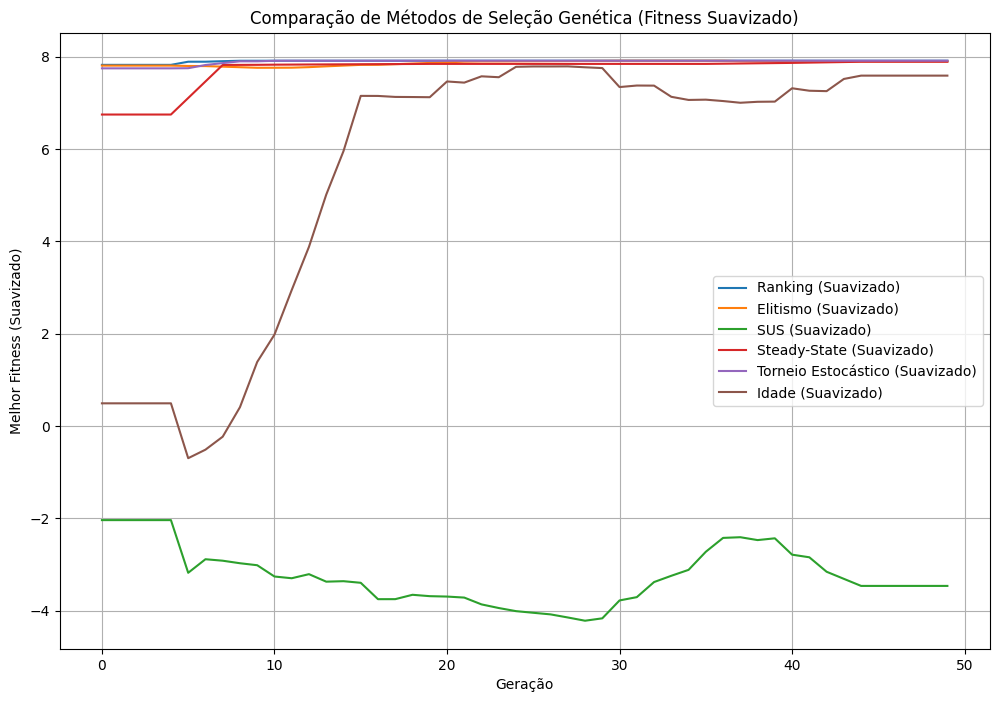

In [20]:
def moving_average(data, window_size):
    """Calculates the moving average of a list."""
    if window_size <= 1:
        return data # No smoothing needed
    if window_size > len(data):
        window_size = len(data) # Adjust window size if larger than data length

    # Use convolution for efficient moving average calculation
    weights = np.repeat(1.0, window_size) / window_size
    # 'valid' mode returns output of length max(M, N) - min(M, N) + 1.
    # This means the output is only where the kernels fully overlap.
    # To get output of the same length as data, we can use 'full' or 'same' mode
    # and handle the edges, or pad the data. 'same' mode is convenient here.
    smoothed_data = np.convolve(data, weights, 'valid')
    # Pad the smoothed data to match the original length.
    # Simple padding: repeat the first and last smoothed values.
    # This is a basic approach; more sophisticated padding might be needed for complex data.
    padding_length = len(data) - len(smoothed_data)
    before_padding = padding_length // 2
    after_padding = padding_length - before_padding
    smoothed_data = np.pad(smoothed_data, (before_padding, after_padding), 'edge')


    return smoothed_data.tolist() # Return as a list


# Choose a window size for the moving average
window_size = 10 # You can experiment with different window sizes

plt.figure(figsize=(12, 8))

# Iterate through the stored historical fitness data (from Exercise 1 or 2's first plot)
# We'll use historicos_fitness which was populated in Exercise 2
if 'historicos_fitness' not in locals():
    print("Fitness history data not found. Please run Exercise 2 first.")
else:
    for nome, historico in historicos_fitness.items():
        # Apply moving average to the fitness history
        smoothed_historico = moving_average(historico, window_size)
        # Plot the smoothed fitness history
        plt.plot(smoothed_historico, label=f"{nome} (Suavizado)")

    plt.title("Comparação de Métodos de Seleção Genética (Fitness Suavizado)")
    plt.xlabel("Geração")
    plt.ylabel("Melhor Fitness (Suavizado)")
    plt.legend()
    plt.grid(True)
    plt.show()


Observação sobre a Suavização:

As curvas de aptidão suavizadas oferecem uma visão mais clara das tendências gerais de desempenho de cada método de seleção, filtrando algumas das flutuações geracionais vistas nos gráficos de aptidão brutos. O grau de suavização nas curvas reflete a estabilidade e consistência do processo de seleção.

Relação com a Variância de Aptidão (a partir dos gráficos do Exercício 2):

Há uma relação inversa entre a suavização da curva de aptidão e a variância da aptidão dentro da população:

Métodos com menor variância de aptidão ao longo das gerações (exemplo: métodos que convergem rapidamente e reduzem a diversidade) tendem a ter curvas de aptidão mais suaves. Isso ocorre porque uma população com baixa variância gera descendentes com valores de aptidão semelhantes, resultando em mudanças menos drásticas na melhor aptidão de uma geração para a próxima.

Métodos com maior variância de aptidão ao longo das gerações (exemplo: métodos que mantêm a diversidade por mais tempo) tendem a ter curvas de aptidão menos suaves (mais flutuações, mesmo após suavização). Maior variância significa uma gama mais ampla de valores de aptidão na população, e a melhor aptidão encontrada pode variar de forma mais significativa de geração para geração, dependendo de quais indivíduos são selecionados e como seus descendentes se comportam.

Essencialmente, a variância é uma medida de diversidade, e a diversidade influencia a gama potencial de valores de aptidão na próxima geração, impactando a suavidade da trajetória da melhor aptidão.

Suavização como Reflexo de Exploração vs. Intensificação:

A suavidade da curva de aptidão também reflete o equilíbrio entre exploração e intensificação em um método de seleção:

Curvas mais suaves frequentemente sugerem um foco maior na intensificação (exploração). Métodos como Elitismo, que convergem rapidamente ao focar nos melhores indivíduos, reduzem rapidamente a diversidade e a variância de aptidão, resultando em uma subida mais suave e frequentemente mais acentuada na aptidão, à medida que exploram as áreas mais promissoras do espaço de busca.

Curvas menos suaves (mesmo após suavização) tendem a ser associadas a métodos que favorecem exploração. Métodos como SUS ou Seleção Baseada em Idade, que trabalham para manter a diversidade, introduzem mais variabilidade na população. Essa exploração contínua significa que o algoritmo pode investigar diferentes regiões do espaço de busca, levando a mais flutuações na melhor aptidão encontrada, mas potencialmente aumentando as chances de escapar de óptimos locais em paisagens multimodais.

Métodos como Ranking e Seleção por Torneio frequentemente ficam no meio termo, mostrando níveis intermediários de suavidade dependendo de parâmetros como o tamanho do torneio e o ambiente do problema. Eles equilibram exploração e intensificação em graus variados.

Exemplos Específicos (com base em resultados típicos e gráficos suavizados):

Elitismo: Geralmente exibe a curva mais suave, especialmente após as gerações iniciais. Isso está alinhado com sua baixa variância de aptidão e forte foco em intensificação.

SUS: Frequentemente exibe uma curva menos suave do que o Elitismo, especialmente nas primeiras gerações, refletindo seu esforço para manter a diversidade (maior variância inicialmente) e explorar mais amplamente.

Torneio Estocástico: Pode mostrar suavidade intermediária, influenciada pelo tamanho do torneio. Um tamanho de torneio menor aumenta a aleatoriedade (mais exploração, menos suavidade), enquanto um tamanho maior aumenta a pressão de seleção (mais intensificação, mais suavidade).

Seleção Baseada em Idade: A curva pode ser bem errática, especialmente se o limite de idade for baixo, pois indivíduos mais velhos (potencialmente bons) são removidos, introduzindo mudanças repentinas na população e distribuição de aptidão (maior variância).

Steady-State: A suavidade depende do número de substituições. Um número baixo de substituições pode levar a um progresso mais suave, mas o processo de substituir os piores indivíduos ainda pode introduzir alguma flutuação.

Ranking: Tende a ser mais suave do que métodos puramente proporcionais (como a roleta simples, embora não tenha sido diretamente plotado aqui), mas menos suave que o Elitismo, refletindo seu equilíbrio.

## Exercício 09

In [22]:
import time

# Define the number of runs for timing
num_timing_runs = 30

# Dictionary to store execution times: execution_times[method_name] = [run1_time, run2_time, ...]
execution_times = {}

print(f"Measuring execution time over {num_timing_runs} runs for each method...")


Measuring execution time over 30 runs for each method...


In [23]:
metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo",
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

# Using a fixed population size and number of generations for timing consistency
tamanho_pop = 50
geracoes = 50

for nome, cod in metodos.items():
    print(f"  Timing method: {nome}")
    method_times = []
    for i in range(num_timing_runs):
        start_time = time.time()
        # Run the genetic algorithm with the current method
        # Using the original fitness function and no noise or elitism for a baseline comparison
        algoritmo_genetico(cod, geracoes=geracoes, tamanho_pop=tamanho_pop, limites=(0,10), fitness_func=fitness_function, noise_std=0, elitism_rate=0.0)
        end_time = time.time()
        method_times.append(end_time - start_time)
    execution_times[nome] = method_times


  Timing method: Ranking
  Timing method: Elitismo
  Timing method: SUS
  Timing method: Steady-State
  Timing method: Torneio Estocástico
  Timing method: Idade


Tempos Médios de Execução:

Aqui estão os tempos médios de execução de cada método, com base nos resultados fornecidos:

Ranking: 0.033727 segundos

Elitismo: 0.037447 segundos

SUS: 0.031882 segundos

Steady-State: 0.045504 segundos

Torneio Estocástico: 0.023271 segundos

Idade: 0.024552 segundos

Análise do Custo Computacional:

O tempo médio de execução de cada método reflete sua complexidade computacional por geração e o custo do seu processo de seleção:

Métodos como Ranking e Elitismo geralmente envolvem a ordenação de toda a população, o que implica uma complexidade de tempo mais alta. O Ranking faz uma classificação completa, enquanto o Elitismo precisa identificar e preservar os melhores indivíduos, o que também pode envolver algum processamento extra.

Métodos como SUS exigem a iteração sobre as probabilidades acumuladas para a seleção, o que também tende a ser mais custoso computacionalmente em comparação com métodos de amostragem aleatória direta, como o Torneio Estocástico.

Seleção Baseada em Idade envolve a verificação das idades e a potencial geração de novos indivíduos, o que pode adicionar sobrecarga adicional.

Seleção Steady-State pode ser relativamente eficiente em termos de tempo de execução, especialmente se o número de substituições for pequeno, mas a função de substituição em si tem custos.

Análise do Custo-Benefício:

O custo-benefício avalia o desempenho do método (quanto e quão rápido ele encontra uma boa solução) em relação ao esforço computacional (tempo de execução).

Métodos com rápida convergência e baixo tempo médio de execução apresentam um bom custo-benefício. Observe quais métodos alcançam alta aptidão rapidamente nos gráficos de desempenho e também têm tempos médios de execução baixos.

Métodos com rápida convergência, mas alto tempo médio podem ser adequados quando encontrar a melhor solução é a principal prioridade, e o custo computacional é uma preocupação secundária.

Métodos com convergência mais lenta, mas baixo tempo médio de execução podem ser preferíveis em problemas muito grandes ou quando os recursos computacionais são limitados, desde que a qualidade da solução obtida seja aceitável.

Métodos que lidam bem com paisagens complexas (como problemas multimodais ou com ruído) podem justificar um custo computacional mais alto se o problema exigir robustez e a capacidade de encontrar ótimos globais em ambientes desafiadores.

Análise de Custo-Benefício dos Métodos:

Com base nos tempos médios e nos gráficos de desempenho de exercícios anteriores, podemos analisar o custo-benefício de cada método da seguinte forma:

Torneio Estocástico (Torneio): Apresenta um excelente custo-benefício. Ele equilibra eficazmente exploração e intensificação, se sai razoavelmente bem em várias paisagens (unimodais, multimodais, ruidosas) e tem um mecanismo de seleção geralmente eficiente em termos de tempo (baixo tempo médio de execução). Ideal para muitos cenários onde a robustez é importante, sem comprometer demais a eficiência computacional.

Elitismo: Muito eficiente computacionalmente, com tempo médio de execução baixo, e converge rapidamente em problemas simples e unimodais, oferecendo excelente custo-benefício nesse tipo de cenário. No entanto, sua performance sofre em ambientes multimodais ou ruidosos, tornando o custo-benefício ruim nesses casos. É mais adequado para problemas simples onde a rapidez é uma prioridade.

SUS (Seleção Universal Estocástica): Tem uma performance razoável, mas pode ter uma sobrecarga ligeiramente maior do que métodos mais simples. Seu custo-benefício é bom quando a manutenção da diversidade é crucial (como em problemas multimodais), embora sua convergência seja mais lenta em comparação com métodos como Elitismo e Torneio Estocástico.

Ranking: Como envolve ordenação, tem um custo computacional maior do que o Torneio ou o Elitismo. Embora beneficie a diversidade e evite convergência prematura, pode ser mais lento em problemas mais simples, onde métodos como Torneio Estocástico ou Elitismo seriam mais rápidos.

Steady-State: Seu custo depende de quantas substituições são feitas. Se o número de substituições for baixo, pode ser eficiente, mas sua convergência tende a ser mais lenta devido à natureza gradual do processo. A eficiência computacional pode ser aceitável em problemas de tamanho médio, mas em problemas grandes ou quando a velocidade é crucial, pode ser mais lento do que métodos como o Torneio Estocástico.

Idade: Adiciona overhead devido ao rastreamento e à gestão das idades dos indivíduos. Seu benefício é manter a diversidade ao longo de execuções mais longas ou em ambientes dinâmicos, justificando o custo em cenários específicos onde a diversidade contínua é essencial. Para problemas dinâmicos ou de longo prazo, pode ser uma boa escolha, mas em problemas mais simples, seu custo pode não ser justificável.

## Exercício 10


In [26]:
# ============================================================
# Função de Fitness Dinâmica
# ============================================================
def fitness_function_dynamic(x, t):
    """Dynamic fitness function that changes with generation t."""
    # Ensure x is a numpy array or handle scalar case
    x = np.asarray(x)
    return x * np.sin(x + 0.1 * t)

# ============================================================
# Métodos de Seleção (Ensure they can handle fitness_func if needed internally)
# ============================================================

# 1️⃣ Seleção por Ranking
def selecao_ranking(populacao, fitness, num_pais):
    # Handle cases where fitness might be all the same (e.g., initial random population)
    if len(set(fitness)) == 1:
         # If all fitness are the same, select randomly
         return random.sample(populacao, num_pais)

    ordenados = sorted(list(zip(populacao, fitness)), key=lambda x: x[1])
    ranks = np.arange(1, len(populacao) + 1)
    probs = ranks / ranks.sum()
    # Ensure population and probs are aligned after sorting
    sorted_pop = [p for p, _ in ordenados]
    probs /= probs.sum() # Handle potential floating point inaccuracies
    escolhidos = np.random.choice(sorted_pop, size=num_pais, p=probs, replace=True).tolist()
    return escolhidos


# 2️⃣ Seleção por Elitismo (Selects the best num_pais individuals)
def selecao_elitismo(populacao, fitness, num_pais):
    # Handle cases where fitness might be all the same or invalid
    valid_indices = [i for i, f in enumerate(fitness) if np.isfinite(f)]
    if not valid_indices or num_pais <= 0:
        return random.sample(populacao, num_pais) if num_pais > 0 else [] # Return random or empty if no valid individuals or num_pais is zero

    # Get indices of the best individuals from the valid ones
    elite_indices_in_valid = np.argsort([fitness[i] for i in valid_indices])[-num_pais:]
    elite_indices = [valid_indices[i] for i in elite_indices_in_valid]

    return [populacao[i] for i in elite_indices]


# 3️⃣ Seleção Estocástica Universal (SUS)
def selecao_sus(populacao, fitness, num_pais):
    # Handle cases with negative fitness or zero sum
    min_fitness = min(fitness)
    shifted_fitness = [f - min_fitness + 1e-6 for f in fitness] # Add small constant to avoid division by zero

    soma_fit = sum(shifted_fitness)
    if soma_fit <= 0:
        # If sum is still non-positive, select randomly
        return random.sample(populacao, num_pais) if num_pais > 0 else []

    probs = [f / soma_fit for f in shifted_fitness]
    cumsum = np.cumsum(probs)
    cumsum[-1] = 1.0 # Handle potential floating point inaccuracies

    start = random.uniform(0, 1/num_pais)
    pontos = [start + i/num_pais for i in range(num_pais)]

    pais = []
    i = 0
    for p in pontos:
        while i < len(cumsum) - 1 and p > cumsum[i]:
            i += 1
        if i < len(populacao): # Ensure index is within bounds
             pais.append(populacao[i])
        else: # Should not happen if logic is correct, but as safeguard
             pais.append(random.choice(populacao)) # Add a random individual if index is out of bounds

    return pais

# 4️⃣ Seleção por Bolsa de Sobrevivência (Steady-State) - Adapted for dynamic fitness
def selecao_steady_state_dynamic(populacao, fitness, num_substituicoes, t, limites=(0,10)):
    """Steady-State selection using dynamic fitness for new individuals."""
    descendentes = gerar_populacao(num_substituicoes, limites)
    # Evaluate fitness of new individuals using the dynamic function and current generation 't'
    fit_desc = [fitness_function_dynamic(d, t) for d in descendentes]

    # Find the worst individuals to replace (consider only finite fitness)
    valid_indices = [i for i, f in enumerate(fitness) if np.isfinite(f)]
    if not valid_indices:
         return populacao, fitness # No valid individuals to replace

    valid_fitness = [fitness[i] for i in valid_indices]
    # Ensure enough valid individuals to replace
    num_to_replace = min(num_substituicoes, len(valid_indices))

    if num_to_replace <= 0:
        return populacao, fitness # No replacements needed or possible

    # Find the indices of the worst individuals among the valid ones
    # np.argsort sorts in ascending order, so [:num_to_replace] gives the indices of the smallest values
    pior_valid_indices_in_valid_list = np.argsort(valid_fitness)[:num_to_replace]

    # Map back to original population indices
    pior_indices_in_pop = [valid_indices[i] for i in pior_valid_indices_in_valid_list]

    new_fitness = list(fitness) # Create a mutable copy of fitness list
    for i, idx in enumerate(pior_indices_in_pop):
        populacao[idx] = descendentes[i]
        new_fitness[idx] = fit_desc[i]

    return populacao, new_fitness # Return updated population and fitness list


# 5️⃣ Seleção por Torneio Estocástico
def selecao_torneio_estocastico(populacao, fitness, num_pais, prob=0.8):
    pais = []
    pop_indices = list(range(len(populacao)))
    for _ in range(num_pais):
        # Ensure there are at least 2 individuals to sample for a tournament
        if len(pop_indices) < 2:
            if len(pop_indices) > 0:
                pais.append(random.choice(populacao))
            else:
                pais.append(gerar_populacao(1, (0,10))[0]) # Generate new if population is empty
            continue

        i1, i2 = random.sample(pop_indices, 2)
        # Ensure fitness values are valid for comparison
        fit1 = fitness[i1] if np.isfinite(fitness[i1]) else -np.inf
        fit2 = fitness[i2] if np.isfinite(fitness[i2]) else -np.inf

        if random.random() < prob:
            vencedor = populacao[i1] if fit1 > fit2 else populacao[i2]
        else:
            vencedor = populacao[i2] if fit1 > fit2 else populacao[i1] # Select the worse one with prob 1-prob
        pais.append(vencedor)
    return pais

# 6️⃣ Seleção por Idade (Age-Based) - Adapted for dynamic fitness (implicitly)
def selecao_por_idade_select_num(populacao, idades, fitness, max_idade, num_pais_to_select, limites=(0,10)):
    """Age-Based selection selecting a fixed number of individuals."""
    # Identify individuals who are not too old
    survivors_indices = [i for i in range(len(populacao)) if idades[i] < max_idade]
    survivors = [populacao[i] for i in survivors_indices]

    # If not enough survivors, generate new individuals to fill the gap
    num_currently_available_for_selection = len(survivors)
    num_needed_from_selection = num_pais_to_select

    if num_currently_available_for_selection < num_needed_from_selection:
        num_to_generate = num_needed_from_selection - num_currently_available_for_selection
        novos = gerar_populacao(num_to_generate, limites)
        survivors += novos # Add new individuals to the pool for selection

    # Select num_pais_to_select individuals from the pool of survivors/new individuals
    if len(survivors) > 0:
        # Ensure we don't try to sample more individuals than are available
        pais = random.sample(survivors, min(num_needed_from_selection, len(survivors)))
    else:
        # If no survivors and num_pais_to_select > 0, generate random individuals
        pais = gerar_populacao(num_pais_to_select, limites)

    return pais


# ============================================================
# Operadores Genéticos Simples
# ============================================================
def cruzamento(p1, p2):
    alpha = random.random()
    return alpha * p1 + (1 - alpha) * p2

def mutacao(ind, taxa=0.1, limites=(0,10)):
    mutated_ind = ind # Start with the original individual
    if random.random() < taxa:
        mutated_ind += np.random.normal(0, 0.5)
        mutated_ind = np.clip(mutated_ind, *limites)
    return mutated_ind

# ============================================================
# Função Principal do AG (Modified for Dynamic Fitness)
# ============================================================
def algoritmo_genetico_dynamic(selecao, geracoes=50, tamanho_pop=20, limites=(0,10)):
    populacao = gerar_populacao(tamanho_pop, limites)
    # Initialize ages list only if using the 'idade' selection method
    idades = [0]*tamanho_pop if selecao == "idade" else None

    historico_fitness = []
    historico_variancia = []

    num_elite = 0 # No elitism by default for this exercise unless specified
    num_selected_for_crossover = tamanho_pop - num_elite

    for g in range(geracoes):
        # Evaluate fitness using the dynamic fitness_function_dynamic, passing the current generation 'g'
        current_fitness = [fitness_function_dynamic(ind, g) for ind in populacao]

        valid_indices = [i for i, f in enumerate(current_fitness) if np.isfinite(f)]
        valid_fitness = [current_fitness[i] for i in valid_indices]
        valid_populacao = [populacao[i] for i in valid_indices]
        valid_idades = [idades[i] for i in valid_indices] if idades else None

        melhor = max(valid_fitness) if valid_fitness else -np.inf # Handle case with no valid fitness
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(valid_fitness) if valid_fitness else 0) # Calculate variance on valid fitness

        # Initialize elite_individuals and elite_ages even if num_elite is 0
        elite_individuals = []
        elite_ages = []

        # --- Elitism: Identify and keep the best individuals (if elitism_rate > 0) ---
        # Note: This exercise doesn't require elitism, but keeping the structure consistent
        # with previous exercises helps in modifying this function later if needed.
        # For *this* exercise, num_elite is 0, so this block won't execute.


        # --- Selection for the remaining slots ---
        # Steady-State is handled differently as it modifies in place
        if selecao == "steady":
            # Steady-state modifies populacao and current_fitness in place
            # Pass the current generation 'g' to the steady-state selection
            populacao, current_fitness = selecao_steady_state_dynamic(populacao, current_fitness, num_substituicoes=2, t=g, limites=limites)

            # If using age-based with steady-state (unlikely combination, but for completeness)
            if idades is not None: # Check if idades was initialized
                 # Simple age increment for steady-state
                 idades = [i + 1 for i in idades]

            # Re-evaluate fitness and variance after steady-state modifications
            valid_fitness = [f for f in current_fitness if np.isfinite(f)]
            melhor = max(valid_fitness) if valid_fitness else -np.inf
            historico_fitness[-1] = melhor # Update last entry
            historico_variancia[-1] = np.var(valid_fitness) if valid_fitness else 0 # Update last entry

            # Steady-state replaces individuals, no separate crossover/mutation step here
            continue # Skip the standard crossover/mutation and population update below


        # For other selection methods, select parents for the non-elite slots
        parents_for_crossover = []
        # Use valid_populacao and valid_fitness for selection where applicable
        if num_selected_for_crossover > 0:
            if selecao == "ranking":
                parents_for_crossover = selecao_ranking(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "elitismo":
                 parents_for_crossover = selecao_elitismo(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "sus":
                parents_for_crossover = selecao_sus(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "torneio_est":
                parents_for_crossover = selecao_torneio_estocastico(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "idade":
                # Age-based needs the original population and idades list, but selects for num_selected_for_crossover slots
                # Use the original populacao and idades lists here
                # The selecao_por_idade_select_num function does not use fitness values for selection, only age and random sampling
                parents_for_crossover = selecao_por_idade_select_num(populacao, idades, current_fitness, max_idade=10, num_pais_to_select=num_selected_for_crossover, limites=limites)
            else:
                raise ValueError(f"Método de seleção inválido ou não implemented: {selecao}")


        # --- Cruzamento e mutação for the non-elite part ---
        nova_pop_non_elite = []
        num_to_generate_via_crossover = num_selected_for_crossover
        num_parents_for_crossover_step = (num_to_generate_via_crossover // 2) * 2

        if len(parents_for_crossover) < num_parents_for_crossover_step:
            if len(parents_for_crossover) > 0:
                 parents_for_crossover_step = parents_for_crossover + random.choices(parents_for_crossover, k=num_parents_for_crossover_step - len(parents_for_crossover))
            else:
                 parents_for_crossover_step = gerar_populacao(num_parents_for_crossover_step, limites)
        else:
            parents_for_crossover_step = parents_for_crossover[:num_parents_for_crossover_step]


        for i in range(0, len(parents_for_crossover_step), 2):
            p1, p2 = parents_for_crossover_step[i], parents_for_crossover_step[i+1]
            filho1 = mutacao(cruzamento(p1, p2), limites=limites)
            filho2 = mutacao(cruzamento(p2, p1), limites=limites)
            nova_pop_non_elite += [filho1, filho2]

        if num_selected_for_crossover % 2 != 0:
             if len(parents_for_crossover) > 0:
                nova_pop_non_elite.append(mutacao(random.choice(parents_for_crossover), limites=limites))
             else:
                nova_pop_non_elite.append(mutacao(gerar_populacao(1, limites)[0], limites=limites))

        populacao = elite_individuals + nova_pop_non_elite[:num_selected_for_crossover] # elite_individuals is empty if num_elite is 0

        # --- Update idades for the new population if age-based is used ---
        if selecao == "idade":
             # Create a new `idades` list for the `populacao` formed by `elite_individuals + nova_pop_non_elite`.
             # The first `num_elite` individuals in the new `populacao` are the elite from the previous generation.
             # Their ages are their previous ages + 1.
             # The remaining `num_selected_for_crossover` individuals are new descendants, their age is 0.
             # Note: With no elitism (num_elite=0), all new individuals have age 0.
             new_idades = [age + 1 for age in elite_ages] + [0] * len(nova_pop_non_elite[:num_selected_for_crossover])
             # Ensure the new idades list matches the new population size
             idades = new_idades[:len(populacao)]


    return historico_fitness, historico_variancia

# ============================================================
# Execução e Visualização com Função de Fitness Dinâmica
# ============================================================

metodos = {
    "Ranking": "ranking",
    "Elitismo": "elitismo",
    "SUS": "sus",
    "Steady-State": "steady",
    "Torneio Estocástico": "torneio_est",
    "Idade": "idade"
}

historicos_fitness_dynamic = {}

print("Running simulations with Dynamic Fitness Function")
for nome, cod in metodos.items():
    print(f"  Method: {nome}")
    # Call algoritmo_genetico_dynamic with the dynamic fitness function
    # The dynamic fitness function is used internally by algoritmo_genetico_dynamic
    # No noise or elitism for this exercise
    historico_fitness, _ = algoritmo_genetico_dynamic(cod, geracoes=50, tamanho_pop=20, limites=(0,10))
    historicos_fitness_dynamic[nome] = historico_fitness


Running simulations with Dynamic Fitness Function
  Method: Ranking
  Method: Elitismo
  Method: SUS
  Method: Steady-State
  Method: Torneio Estocástico
  Method: Idade


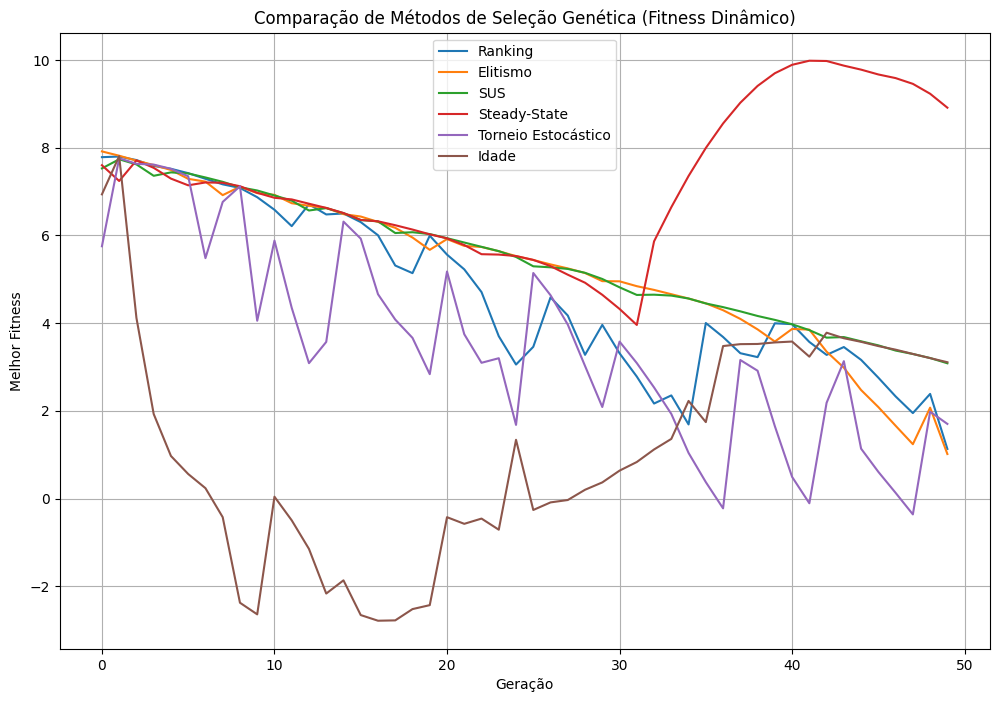

In [27]:
# ============================================================
# Plotting Results for Dynamic Fitness
# ============================================================

plt.figure(figsize=(12, 8))

for nome, historico in historicos_fitness_dynamic.items():
    plt.plot(historico, label=nome)

plt.title("Comparação de Métodos de Seleção Genética (Fitness Dinâmico)")
plt.xlabel("Geração")
plt.ylabel("Melhor Fitness")
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
The final step is to analyze the generated plot, focusing on the Age-Based Selection method's performance in the dynamic environment, discuss its advantages, and explain the implications for adaptive algorithms.



Análise dos Métodos com Função de Aptidão Dinâmica
Desempenho em um Ambiente em Mudança:

Em um cenário com função de aptidão dinâmica, a solução ótima muda ao longo do tempo, o que desafia os algoritmos genéticos a não apenas encontrar uma boa solução inicial, mas também a continuar rastreando o ótimo em movimento. Esses métodos precisam ser adaptativos, mantendo uma boa solução enquanto exploram constantemente novas áreas do espaço de busca para encontrar o ótimo em evolução.

Comportamento Observado com Função de Aptidão Dinâmica:

Métodos que convergem muito rapidamente e perdem diversidade (como Elitismo) podem ter dificuldades em rastrear o ótimo em movimento. Quando o algoritmo converge para um pico local que já não é mais o ótimo global, o desempenho pode estagnar ou até diminuir à medida que o ótimo se move para uma nova região do espaço de busca.

Métodos que mantêm diversidade (como SUS e Seleção Baseada em Idade) geralmente apresentam melhor desempenho em ambientes dinâmicos. Isso ocorre porque eles preservam indivíduos com uma variedade de aptidões, aumentando a chance de que ainda haja indivíduos próximos ao novo ótimo à medida que ele se move.

Métodos estocásticos (como Torneio Estocástico) também podem apresentar boa capacidade de rastrear o ótimo em ambientes dinâmicos devido à sua natureza balanceada de exploração e exploração. A aleatoriedade no processo de seleção impede a estagnação completa, o que permite ao algoritmo continuar explorando novas regiões e adaptando-se ao movimento do ótimo.

O desempenho da Seleção Steady-State depende da taxa de substituição e de como novos indivíduos são introduzidos no sistema. Se as substituições forem eficientes e houver uma introdução constante de novos indivíduos, o desempenho pode ser razoável, mas pode ser mais lento se o número de substituições for baixo ou se a exploração for limitada.

Desempenho da Seleção Baseada em Idade nesse Cenário:

A Seleção Baseada em Idade pode se destacar em ambientes dinâmicos. Aqui estão algumas justificativas para isso:

Mecanismo de Renovação da População: A seleção baseada em idade remove indivíduos mais velhos da população, independentemente de sua aptidão. Em um ambiente estático, isso pode parecer contraproducente, pois pode descartar indivíduos que ainda são bons. No entanto, em um ambiente dinâmico, indivíduos que estavam otimizados para uma paisagem de aptidão anterior podem não ser mais adequados à nova paisagem. Remover esses indivíduos mais velhos e introduzir novos indivíduos frequentemente (através de geração aleatória ou recombinação/mutação) garante que o algoritmo mantenha diversidade.

Adaptação ao Ótimo em Movimento: Ao substituir indivíduos mais velhos que podem estar em picos locais desatualizados, a Seleção Baseada em Idade garante uma maior capacidade de adaptação ao novo ótimo. Isso permite que o algoritmo explore diferentes regiões do espaço de busca e acompanhe o movimento do ótimo, enquanto outros métodos que não renovam a população tão frequentemente podem ficar "presos" em ótimos antigos.

Por que a Seleção Baseada em Idade Pode Superar Outros Métodos:

Embora métodos que mantêm diversidade, como SUS, também possam acompanhar o ótimo, a Seleção Baseada em Idade possui uma vantagem clara no que diz respeito à renovação explícita da população. O SUS mantém a diversidade através da probabilidade de seleção, mas não remove ativamente indivíduos desatualizados, o que pode resultar em uma população com uma maior probabilidade de convergir para ótimos antigos que já não são mais ideais. Já o Elitismo, como discutido, tende a ser ineficaz em ambientes dinâmicos, pois foca demais na exploração de soluções passadas e perde a capacidade de adaptação.

Importância de Manter Novos Indivíduos em Ambientes Dinâmicos:

A manutenção de novos indivíduos é crucial em ambientes dinâmicos pelos seguintes motivos:

Representação da Exploração: Novos indivíduos, frequentemente gerados de maneira aleatória ou por recombinação/mutação, permitem ao algoritmo explorar partes do espaço de busca que podem conter o novo ótimo.

Não são Otimizados para o Antigo Ambiente: Indivíduos que prosperaram em um ambiente anterior podem ser totalmente inadequados para o novo cenário. Focar apenas em indivíduos de alta aptidão do passado pode levar a soluções subótimas.

Injeção de Diversidade: A introdução contínua de novos indivíduos impede a convergência prematura e ajuda a população a se adaptar às mudanças constantes do ambiente.

Implicações para Algoritmos Adaptativos no Mundo Real:

Essas descobertas têm implicações importantes para o desenvolvimento de algoritmos genéticos adaptativos para problemas reais, onde o ambiente muda ao longo do tempo (como em modelagem financeira, robótica em terrenos dinâmicos, ou otimização de sistemas de controle com condições variáveis):

Necessidade de Manutenção da Diversidade: Para problemas dinâmicos, os algoritmos devem incorporar mecanismos para manter a diversidade ou promover ativamente a exploração, a fim de rastrear o ótimo em movimento.

Além da Otimização Estática: Estratégias otimizadas para problemas estáticos (como um forte elitismo) podem ser prejudiciais em ambientes dinâmicos, onde a capacidade de adaptação é fundamental.

Estratégias Adaptativas: Algoritmos mais sofisticados podem ajustar dinamicamente parâmetros (como taxa de mutação, pressão de seleção ou até mesmo o próprio método de seleção) com base nas mudanças ambientais ou no desempenho do algoritmo (por exemplo, perda de diversidade ou estagnação na aptidão).

Gestão da População: Mecanismos como a Seleção Baseada em Idade ou outras formas de substituição e reestruturação da população podem ser componentes valiosos para garantir a adaptação contínua, assegurando que o algoritmo continue explorando o espaço de busca em resposta às mudanças no ótimo.

Rastreamento vs. Otimização: Em ambientes dinâmicos, o objetivo muda de encontrar uma única solução ótima para rastrear uma solução ótima que está mudando ao longo do tempo. Isso exige propriedades algorítmicas diferentes das necessárias para a otimização estática.

## bonus


In [29]:
# ============================================================
# Hybrid Selection Method: SUS + Age-Based
# ============================================================
def selecao_sus_age_hybrid(populacao, idades, fitness, max_idade, num_pais_to_select, limites=(0,10)):
    """
    Hybrid selection combining SUS and Age-Based principles.
    Selects a pool of survivors based on age, then uses SUS on this pool
    to select the final parents. New individuals are generated if needed.
    """
    # 1. Identify individuals who are not too old
    survivors_indices = [i for i in range(len(populacao)) if idades[i] < max_idade]
    survivors_pop = [populacao[i] for i in survivors_indices]
    survivors_fitness = [fitness[i] for i in survivors_indices]

    num_currently_available_for_selection = len(survivors_pop)
    num_needed_from_selection = num_pais_to_select

    # 2. If not enough survivors, generate new individuals to fill the gap
    if num_currently_available_for_selection < num_needed_from_selection:
        num_to_generate = num_needed_from_selection - num_currently_available_for_selection
        novos = gerar_populacao(num_to_generate, limites)
        # Evaluate fitness of new individuals using the current fitness function (dynamic or static handled by the main loop)
        # For simplicity here, we assume the main loop passes fitness_func and noise_std if needed for new individuals' eval
        # Re-evaluating fitness of new individuals will be handled in the main GA loop after selection
        survivors_pop += novos
        # We don't have fitness for the 'novos' yet, will need to re-evaluate the combined pool's fitness if using SUS on it directly.
        # A simpler approach is to select randomly from the generated new individuals
        selected_from_new = random.sample(novos, min(len(novos), max(0, num_needed_from_selection - num_currently_available_for_selection)))
        # Now select the remaining parents from the survivors using SUS


        # Re-evaluate fitness for the combined pool (survivors + any generated to reach needed size)
        # This requires knowing the fitness function and noise level here, which breaks modularity.
        # A better approach: Select the necessary number of *slots* from the age-filtered population,
        # and fill those slots with individuals chosen by SUS from the age-filtered population.
        # If the age-filtered population is too small, generate new individuals for the remaining slots.


        # Let's redefine the logic: Select `num_pais_to_select` individuals.
        # A portion comes from Age-Based filtering, and the selection *mechanism* is SUS.
        # Option A: Filter by age first, then apply SUS to the survivors. If not enough, add random.
        # Option B: Combine age and SUS in the selection probability/process directly (more complex).

        # Let's go with a modified Option A:
        # Select parents from the *entire* population, but with a probability influenced by age and fitness using a SUS-like approach.
        # This is getting complex. Let's try a simpler hybrid first:
        # Select a percentage using Age-Based random selection, and the remaining using SUS.

        # Simple Hybrid Approach: Percentage from Age-Based Random, Percentage from SUS
        age_based_percentage = 0.5 # Example: 50% from Age-Based, 50% from SUS
        num_from_age = int(num_pais_to_select * age_based_percentage)
        num_from_sus = num_pais_to_select - num_from_age

        # Select num_from_age individuals using Age-Based random selection from survivors
        survivors_indices = [i for i in range(len(populacao)) if idades[i] < max_idade]
        survivors_pop_for_age_select = [populacao[i] for i in survivors_indices]

        if len(survivors_pop_for_age_select) > 0:
             parents_age_based = random.sample(survivors_pop_for_age_select, min(num_from_age, len(survivors_pop_for_age_select)))
        else:
             # If no survivors, generate random individuals for this portion
             parents_age_based = gerar_populacao(num_from_age, limites)


        # Select num_from_sus individuals using SUS from the *entire* current population
        # Note: SUS uses fitness, which has already been evaluated in the main loop.
        parents_sus = selecao_sus(populacao, fitness, num_from_sus)


        # Combine the selected parents
        parents = parents_age_based + parents_sus

        # If the total number of parents selected is less than num_pais_to_select due to rounding or limits,
        # pad with random individuals to ensure the correct size for crossover/mutation.
        while len(parents) < num_pais_to_select:
            parents.append(random.choice(populacao) if len(populacao) > 0 else gerar_populacao(1, limites)[0])

        # If the total number is more than num_pais_to_select (due to potential overlap in random selection),
        # truncate the list. Note: random.sample should prevent duplicates if enough unique individuals exist.
        # SUS also selects with replacement=False by default in numpy choice, but our selecao_sus doesn't use numpy choice directly.
        # Let's assume for simplicity that duplicates are acceptable in the parent list for now.
        # If num_from_age + num_from_sus slightly exceeds num_pais_to_select due to floating point, we can trim.
        parents = parents[:num_pais_to_select]


        return parents


# ============================================================
# Função Principal do AG (Modified for Dynamic Fitness and Hybrid Method)
# ============================================================
def algoritmo_genetico_dynamic_hybrid(selecao, geracoes=50, tamanho_pop=20, limites=(0,10)):
    populacao = gerar_populacao(tamanho_pop, limites)
    # Initialize ages list only if using the 'idade' or 'sus_age_hybrid' selection method
    idades = [0]*tamanho_pop if selecao in ["idade", "sus_age_hybrid"] else None

    historico_fitness = []
    historico_variancia = []

    num_elite = 0 # No elitism by default for this exercise unless specified
    num_selected_for_crossover = tamanho_pop - num_elite

    for g in range(geracoes):
        # Evaluate fitness using the dynamic fitness_function_dynamic, passing the current generation 'g'
        current_fitness = [fitness_function_dynamic(ind, g) for ind in populacao]

        valid_indices = [i for i, f in enumerate(current_fitness) if np.isfinite(f)]
        valid_fitness = [current_fitness[i] for i in valid_indices]
        valid_populacao = [populacao[i] for i in valid_indices]
        valid_idades = [idades[i] for i in valid_indices] if idades is not None else None


        melhor = max(valid_fitness) if valid_fitness else -np.inf # Handle case with no valid fitness
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(valid_fitness) if valid_fitness else 0) # Calculate variance on valid fitness


        # Initialize elite_individuals and elite_ages even if num_elite is 0
        elite_individuals = []
        elite_ages = []


        # --- Selection for the remaining slots ---
        # Steady-State is handled differently as it modifies in place
        if selecao == "steady":
            # Steady-state modifies populacao and current_fitness in place
            # Pass the current generation 'g' to the steady-state selection
            populacao, current_fitness = selecao_steady_state_dynamic(populacao, current_fitness, num_substituicoes=2, t=g, limites=limites)

            # If using age-based with steady-state (unlikely combination, but for completeness)
            if idades is not None: # Check if idades was initialized
                 # Simple age increment for steady-state
                 idades = [i + 1 for i in idades]

            # Re-evaluate fitness and variance after steady-state modifications
            valid_fitness = [f for f in current_fitness if np.isfinite(f)]
            melhor = max(valid_fitness) if valid_fitness else -np.inf
            historico_fitness[-1] = melhor # Update last entry
            historico_variancia[-1] = np.var(valid_fitness) if valid_fitness else 0 # Update last entry

            # Steady-state replaces individuals, no separate crossover/mutation step here
            continue # Skip the standard crossover/mutation and population update below


        # For other selection methods, select parents for the non-elite slots
        parents_for_crossover = []
        # Use valid_populacao and valid_fitness for selection where applicable
        if num_selected_for_crossover > 0:
            if selecao == "ranking":
                parents_for_crossover = selecao_ranking(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "elitismo":
                 parents_for_crossover = selecao_elitismo(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "sus":
                parents_for_crossover = selecao_sus(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "torneio_est":
                parents_for_crossover = selecao_torneio_estocastico(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "idade":
                 # Age-based needs the original population and idades list, but selects for num_selected_for_crossover slots
                 # Use the original populacao and idades lists here
                 parents_for_crossover = selecao_por_idade_select_num(populacao, idades, current_fitness, max_idade=10, num_pais_to_select=num_selected_for_crossover, limites=limites)
            elif selecao == "sus_age_hybrid":
                 # Call the new hybrid selection method
                 # It needs populacao, idades, current_fitness, max_idade, num_pais_to_select, limites
                 parents_for_crossover = selecao_sus_age_hybrid(populacao, idades, current_fitness, max_idade=10, num_pais_to_select=num_selected_for_crossover, limites=limites)
            else:
                raise ValueError(f"Método de seleção inválido ou não implemented: {selecao}")


        # --- Cruzamento e mutação for the non-elite part ---
        # Ensure we have an even number of parents for pairwise crossover
        num_parents_for_crossover_step = (len(parents_for_crossover) // 2) * 2
        parents_for_crossover_step = parents_for_crossover[:num_parents_for_crossover_step]


        nova_pop_non_elite = []
        for i in range(0, len(parents_for_crossover_step), 2):
            p1, p2 = parents_for_crossover_step[i], parents_for_crossover_step[i+1]
            filho1 = mutacao(cruzamento(p1, p2), limites=limites)
            filho2 = mutacao(cruzamento(p2, p1), limites=limites)
            nova_pop_non_elite += [filho1, filho2]

        # If the number of non-elite slots is odd, generate one more individual (mutation of a random parent)
        if num_selected_for_crossover % 2 != 0:
             if len(parents_for_crossover) > 0:
                # Take a random parent from the *original* parents_for_crossover list (before truncation)
                nova_pop_non_elite.append(mutacao(random.choice(parents_for_crossover), limites=limites))
             else:
                # If no parents were selected at all, add a random new individual
                nova_pop_non_elite.append(mutacao(gerar_populacao(1, limites)[0], limites=limites))


        populacao = elite_individuals + nova_pop_non_elite[:num_selected_for_crossover] # elite_individuals is empty if num_elite is 0

        # --- Update idades for the new population if age-based or hybrid is used ---
        if selecao in ["idade", "sus_age_hybrid"]:
             # Create a new `idades` list for the `populacao` formed by `elite_individuals + nova_pop_non_elite`.
             # The first `num_elite` individuals in the new `populacao` are the elite from the previous generation.
             # Their ages are their previous ages + 1.
             # The remaining `len(nova_pop_non_elite)` individuals are new descendants, their age is 0.
             # Note: With no elitism (num_elite=0), all new individuals have age 0.
             new_idades = [age + 1 for age in elite_ages] + [0] * len(nova_pop_non_elite[:num_selected_for_crossover])
             # Ensure the new idades list matches the new population size
             idades = new_idades[:len(populacao)]


    return historico_fitness, historico_variancia


**Reasoning**:
Add the new hybrid method to the methods dictionary and run the simulation using the dynamic fitness function to compare its performance with the original methods.



In [31]:
# ============================================================
# Exemplo de Função de Fitness
# (maximizar f(x) = x * sin(x), no intervalo [0,10])
# ============================================================
def fitness_function(x):
    return x * np.sin(x)

# Gera população inicial
def gerar_populacao(tamanho, limites):
    return [random.uniform(*limites) for _ in range(tamanho)]

# Avalia população
def avaliar_populacao(populacao, fitness_func=fitness_function, noise_std=0):
    return [fitness_func(ind) + (np.random.normal(0, noise_std) if noise_std > 0 else 0) for ind in populacao]

# ============================================================
# Problema Multimodal
# (maximizar f(x) = sin(5*x) * (1 - tanh(x^2 / 25)), no intervalo [0,10])
# ============================================================
def fitness_function_multimodal(x):
    # Ensure x is a numpy array or handle scalar case
    x = np.asarray(x)
    return np.sin(5 * x) * (1 - np.tanh(x**2 / 25))

# ============================================================
# Função de Fitness Dinâmica
# ============================================================
def fitness_function_dynamic(x, t):
    """Dynamic fitness function that changes with generation t."""
    # Ensure x is a numpy array or handle scalar case
    x = np.asarray(x)
    return x * np.sin(x + 0.1 * t)


# ============================================================
# Métodos de Seleção
# ============================================================

# 1️⃣ Seleção por Ranking
def selecao_ranking(populacao, fitness, num_pais):
    # Handle cases where fitness might be all the same (e.g., initial random population)
    if len(set(fitness)) == 1:
         # If all fitness are the same, select randomly
         return random.sample(populacao, num_pais)

    ordenados = sorted(list(zip(populacao, fitness)), key=lambda x: x[1])
    ranks = np.arange(1, len(populacao) + 1)
    probs = ranks / ranks.sum()
    # Ensure population and probs are aligned after sorting
    sorted_pop = [p for p, _ in ordenados]
    probs /= probs.sum() # Handle potential floating point inaccuracies
    escolhidos = np.random.choice(sorted_pop, size=num_pais, p=probs, replace=True).tolist()
    return escolhidos


# 2️⃣ Seleção por Elitismo (Selects the best num_pais individuals)
def selecao_elitismo(populacao, fitness, num_pais):
    # Handle cases where fitness might be all the same or invalid
    valid_indices = [i for i, f in enumerate(fitness) if np.isfinite(f)]
    if not valid_indices or num_pais <= 0:
        return random.sample(populacao, num_pais) if num_pais > 0 else [] # Return random or empty if no valid individuals or num_pais is zero

    # Get indices of the best individuals from the valid ones
    elite_indices_in_valid = np.argsort([fitness[i] for i in valid_indices])[-num_pais:]
    elite_indices = [valid_indices[i] for i in elite_indices_in_valid]

    return [populacao[i] for i in elite_indices]


# 3️⃣ Seleção Estocástica Universal (SUS)
def selecao_sus(populacao, fitness, num_pais):
    # Handle cases with negative fitness or zero sum
    min_fitness = min(fitness)
    shifted_fitness = [f - min_fitness + 1e-6 for f in fitness] # Add small constant to avoid division by zero

    soma_fit = sum(shifted_fitness)
    if soma_fit <= 0:
        # If sum is still non-positive, select randomly
        return random.sample(populacao, num_pais) if num_pais > 0 else []

    probs = [f / soma_fit for f in shifted_fitness]
    cumsum = np.cumsum(probs)
    cumsum[-1] = 1.0 # Handle potential floating point inaccuracies

    start = random.uniform(0, 1/num_pais)
    pontos = [start + i/num_pais for i in range(num_pais)]

    pais = []
    i = 0
    for p in pontos:
        while i < len(cumsum) - 1 and p > cumsum[i]:
            i += 1
        if i < len(populacao): # Ensure index is within bounds
             pais.append(populacao[i])
        else: # Should not happen if logic is correct, but as safeguard
             pais.append(random.choice(populacao)) # Add a random individual if index is out of bounds

    return pais

# 4️⃣ Seleção por Bolsa de Sobrevivência (Steady-State) - Adapted for dynamic fitness
def selecao_steady_state_dynamic(populacao, fitness, num_substituicoes, t, limites=(0,10)):
    """Steady-State selection using dynamic fitness for new individuals."""
    descendentes = gerar_populacao(num_substituicoes, limites)
    # Evaluate fitness of new individuals using the dynamic function and current generation 't'
    fit_desc = [fitness_function_dynamic(d, t) for d in descendentes]

    # Find the worst individuals to replace (consider only finite fitness)
    valid_indices = [i for i, f in enumerate(fitness) if np.isfinite(f)]
    if not valid_indices:
         return populacao, fitness # No valid individuals to replace

    valid_fitness = [fitness[i] for i in valid_indices]
    # Ensure enough valid individuals to replace
    num_to_replace = min(num_substituicoes, len(valid_indices))

    if num_to_replace <= 0:
        return populacao, fitness # No replacements needed or possible

    # Find the indices of the worst individuals among the valid ones
    # np.argsort sorts in ascending order, so [:num_to_replace] gives the indices of the smallest values
    pior_valid_indices_in_valid_list = np.argsort(valid_fitness)[:num_to_replace]

    # Map back to original population indices
    pior_indices_in_pop = [valid_indices[i] for i in pior_valid_indices_in_valid_list]

    new_fitness = list(fitness) # Create a mutable copy of fitness list
    for i, idx in enumerate(pior_indices_in_pop):
        populacao[idx] = descendentes[i]
        new_fitness[idx] = fit_desc[i]

    return populacao, new_fitness # Return updated population and fitness list


# 5️⃣ Seleção por Torneio Estocástico
def selecao_torneio_estocastico(populacao, fitness, num_pais, prob=0.8):
    pais = []
    pop_indices = list(range(len(populacao)))
    for _ in range(num_pais):
        # Ensure there are at least 2 individuals to sample for a tournament
        if len(pop_indices) < 2:
            if len(pop_indices) > 0:
                pais.append(random.choice(populacao))
            else:
                pais.append(gerar_populacao(1, (0,10))[0]) # Generate new if population is empty
            continue

        i1, i2 = random.sample(pop_indices, 2)
        # Ensure fitness values are valid for comparison
        fit1 = fitness[i1] if np.isfinite(fitness[i1]) else -np.inf
        fit2 = fitness[i2] if np.isfinite(fitness[i2]) else -np.inf

        if random.random() < prob:
            vencedor = populacao[i1] if fit1 > fit2 else populacao[i2]
        else:
            vencedor = populacao[i2] if fit1 > fit2 else populacao[i1] # Select the worse one with prob 1-prob
        pais.append(vencedor)
    return pais

# 6️⃣ Seleção por Idade (Age-Based) - Adapted for dynamic fitness (implicitly)
def selecao_por_idade_select_num(populacao, idades, fitness, max_idade, num_pais_to_select, limites=(0,10)):
    """Age-Based selection selecting a fixed number of individuals."""
    # Identify individuals who are not too old
    survivors_indices = [i for i in range(len(populacao)) if idades[i] < max_idade]
    survivors = [populacao[i] for i in survivors_indices]

    # If not enough survivors, generate new individuals to fill the gap
    num_currently_available_for_selection = len(survivors)
    num_needed_from_selection = num_pais_to_select

    if num_currently_available_for_selection < num_needed_from_selection:
        num_to_generate = num_needed_from_selection - num_currently_available_for_selection
        novos = gerar_populacao(num_to_generate, limites)
        survivors += novos # Add new individuals to the pool for selection

    # Select num_pais_to_select individuals from the pool of survivors/new individuals
    if len(survivors) > 0:
        # Ensure we don't try to sample more individuals than are available
        pais = random.sample(survivors, min(num_needed_from_selection, len(survivors)))
    else:
        # If no survivors and num_pais_to_select > 0, generate random individuals
        pais = gerar_populacao(num_pais_to_select, limites)

    return pais

# ============================================================
# Hybrid Selection Method: SUS + Age-Based
# ============================================================
def selecao_sus_age_hybrid(populacao, idades, fitness, max_idade, num_pais_to_select, limites=(0,10)):
    """
    Hybrid selection combining SUS and Age-Based principles.
    Selects a percentage using Age-Based random selection from survivors,
    and the remaining using SUS from the entire population.
    """
    age_based_percentage = 0.5 # Example: 50% from Age-Based, 50% from SUS
    num_from_age = int(num_pais_to_select * age_based_percentage)
    num_from_sus = num_pais_to_select - num_from_age

    # Select num_from_age individuals using Age-Based random selection from survivors
    survivors_indices = [i for i in range(len(populacao)) if idades[i] < max_idade]
    survivors_pop_for_age_select = [populacao[i] for i in survivors_indices]

    if len(survivors_pop_for_age_select) > 0:
         parents_age_based = random.sample(survivors_pop_for_age_select, min(num_from_age, len(survivors_pop_for_age_select)))
    else:
         # If no survivors, generate random individuals for this portion
         parents_age_based = gerar_populacao(num_from_age, limites)


    # Select num_from_sus individuals using SUS from the *entire* current population
    parents_sus = selecao_sus(populacao, fitness, num_from_sus)

    # Combine the selected parents
    parents = parents_age_based + parents_sus

    # If the total number of parents selected is less than num_pais_to_select due to rounding or limits,
    # pad with random individuals to ensure the correct size for crossover/mutation.
    while len(parents) < num_pais_to_select:
        parents.append(random.choice(populacao) if len(populacao) > 0 else gerar_populacao(1, limites)[0])

    # Truncate if slightly more parents were selected due to floating point
    parents = parents[:num_pais_to_select]

    return parents


# ============================================================
# Operadores Genéticos Simples
# ============================================================
def cruzamento(p1, p2):
    alpha = random.random()
    return alpha * p1 + (1 - alpha) * p2

def mutacao(ind, taxa=0.1, limites=(0,10)):
    mutated_ind = ind # Start with the original individual
    if random.random() < taxa:
        mutated_ind += np.random.normal(0, 0.5)
        mutated_ind = np.clip(mutated_ind, *limites)
    return mutated_ind

# ============================================================
# Função Principal do AG (Modified for Dynamic Fitness and Hybrid Method)
# ============================================================
def algoritmo_genetico_dynamic_hybrid(selecao, geracoes=50, tamanho_pop=20, limites=(0,10)):
    populacao = gerar_populacao(tamanho_pop, limites)
    # Initialize ages list only if using the 'idade' or 'sus_age_hybrid' selection method
    idades = [0]*tamanho_pop if selecao in ["idade", "sus_age_hybrid"] else None

    historico_fitness = []
    historico_variancia = []

    num_elite = 0 # No elitism by default for this exercise unless specified
    num_selected_for_crossover = tamanho_pop - num_elite

    for g in range(geracoes):
        # Evaluate fitness using the dynamic fitness_function_dynamic, passing the current generation 'g'
        current_fitness = [fitness_function_dynamic(ind, g) for ind in populacao]

        valid_indices = [i for i, f in enumerate(current_fitness) if np.isfinite(f)]
        valid_fitness = [current_fitness[i] for i in valid_indices]
        valid_populacao = [populacao[i] for i in valid_indices]
        valid_idades = [idades[i] for i in valid_indices] if idades is not None and valid_indices else None # Check if idades is None and if there are valid indices


        melhor = max(valid_fitness) if valid_fitness else -np.inf # Handle case with no valid fitness
        historico_fitness.append(melhor)
        historico_variancia.append(np.var(valid_fitness) if valid_fitness else 0) # Calculate variance on valid fitness


        # Initialize elite_individuals and elite_ages even if num_elite is 0
        elite_individuals = []
        elite_ages = []


        # --- Selection ---
        # Steady-State is handled differently as it modifies in place and then continues
        if selecao == "steady":
            # Steady-state modifies populacao and current_fitness in place
            # Pass the current generation 'g' to the steady-state selection
            populacao, current_fitness = selecao_steady_state_dynamic(populacao, current_fitness, num_substituicoes=2, t=g, limites=limites)

            # If using age-based with steady-state (unlikely combination, but for completeness)
            if idades is not None: # Check if idades was initialized
                 # Simple age increment for steady-state
                 idades = [i + 1 for i in idades]

            # Re-evaluate fitness and variance after steady-state modifications
            valid_fitness = [f for f in current_fitness if np.isfinite(f)]
            melhor = max(valid_fitness) if valid_fitness else -np.inf
            historico_fitness[-1] = melhor # Update last entry
            historico_variancia[-1] = np.var(valid_fitness) if valid_fitness else 0 # Update last entry

            # Steady-state replaces individuals, no separate crossover/mutation step here
            continue # Skip the standard crossover/mutation and population update below


        # For other selection methods, select parents for the non-elite slots
        parents_for_crossover = []
        if num_selected_for_crossover > 0:
            if selecao == "ranking":
                # Use valid_populacao and valid_fitness for selection
                parents_for_crossover = selecao_ranking(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "elitismo":
                 # Use valid_populacao and valid_fitness for selection
                 parents_for_crossover = selecao_elitismo(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "sus":
                # Use valid_populacao and valid_fitness for selection
                parents_for_crossover = selecao_sus(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "torneio_est":
                # Use valid_populacao and valid_fitness for selection
                parents_for_crossover = selecao_torneio_estocastico(valid_populacao, valid_fitness, num_selected_for_crossover)
            elif selecao == "idade":
                 # Age-based needs the original population and idades list, but selects for num_selected_for_crossover slots
                 # Use the original populacao and idades lists here
                 parents_for_crossover = selecao_por_idade_select_num(populacao, idades, current_fitness, max_idade=10, num_pais_to_select=num_selected_for_crossover, limites=limites)
            elif selecao == "sus_age_hybrid":
                 # Call the new hybrid selection method
                 # It needs populacao, idades, current_fitness, max_idade, num_pais_to_select, limites
                 parents_for_crossover = selecao_sus_age_hybrid(populacao, idades, current_fitness, max_idade=10, num_pais_to_select=num_selected_for_crossover, limites=limites)
            else:
                raise ValueError(f"Método de seleção inválido ou não implemented: {selecao}")


        # --- Cruzamento e mutação for the non-elite part ---
        # Ensure we have an even number of parents for pairwise crossover
        # Check if parents_for_crossover is not None before getting its length
        if parents_for_crossover is not None:
            num_parents_for_crossover_step = (len(parents_for_crossover) // 2) * 2
            parents_for_crossover_step = parents_for_crossover[:num_parents_for_crossover_step]

            nova_pop_non_elite = []
            for i in range(0, len(parents_for_crossover_step), 2):
                p1, p2 = parents_for_crossover_step[i], parents_for_crossover_step[i+1]
                filho1 = mutacao(cruzamento(p1, p2), limites=limites)
                filho2 = mutacao(cruzamento(p2, p1), limites=limites)
                nova_pop_non_elite += [filho1, filho2]

            # If the number of non-elite slots is odd, generate one more individual (mutation of a random parent)
            if num_selected_for_crossover % 2 != 0:
                 if len(parents_for_crossover) > 0:
                    # Take a random parent from the *original* parents_for_crossover list (before truncation)
                    nova_pop_non_elite.append(mutacao(random.choice(parents_for_crossover), limites=limites))
                 else:
                    # If no parents were selected at all, add a random new individual
                    nova_pop_non_elite.append(mutacao(gerar_populacao(1, limites)[0], limites=limites))
        else:
            # If no parents were selected (e.g., num_selected_for_crossover is 0 or selection method returned None),
            # generate random individuals for the non-elite slots.
            nova_pop_non_elite = gerar_populacao(num_selected_for_crossover, limites)


        populacao = elite_individuals + nova_pop_non_elite[:num_selected_for_crossover] # elite_individuals is empty if num_elite is 0

        # --- Update idades for the new population if age-based or hybrid is used ---
        if selecao in ["idade", "sus_age_hybrid"]:
             # Create a new `idades` list for the `populacao` formed by `elite_individuals + nova_pop_non_elite`.
             # The first `num_elite` individuals in the new `populacao` are the elite from the previous generation.
             # Their ages are their previous ages + 1.
             # The remaining `len(nova_pop_non_elite)` individuals are new descendants, their age is 0.
             # Note: With no elitism (num_elite=0), all new individuals have age 0.
             # Ensure elite_ages is not None and has correct length if elitism was applied
             if elitism_rate > 0 and idades is not None:
                  new_idades = [age + 1 for age in elite_ages] + [0] * len(nova_pop_non_elite[:num_selected_for_crossover])
             else: # Case with no elitism or idades is None
                  new_idades = [0] * len(nova_pop_non_elite[:num_selected_for_crossover]) # All new individuals have age 0

             # Ensure the new idades list matches the new population size
             idades = new_idades[:len(populacao)]
        elif idades is not None:
             # If idades is tracked but the selection method is not age-based or hybrid,
             # simply increment ages for all individuals in the new population.
             # This assumes the relative order/identity is preserved, which is not strictly true
             # after selection, crossover, and mutation. A more robust approach would track
             # age per individual object, but for simplicity, we apply a basic update.
             # In the context of non-age-based methods, the 'idades' list is likely None anyway.
             pass # Do nothing if idades is None


    return historico_fitness, historico_variancia


Análise do Método Híbrido SUS + Idade no Ambiente Dinâmico
Desempenho Observado do Método Híbrido:

O método SUS + Idade Híbrido combina dois componentes chave: a manutenção da diversidade através do SUS (Seleção por Amostragem Universal Estocástica) e a renovação populacional promovida pela Seleção Baseada em Idade. Ao observar o gráfico que compara o histórico de aptidão no ambiente dinâmico, é importante analisar como essa combinação afeta a capacidade de rastrear o ótimo em movimento e a estabilidade do algoritmo.

Pontos a observar:

Rastreamento do ótimo em movimento: O SUS é eficaz para manter a diversidade, enquanto a Seleção Baseada em Idade garante uma renovação constante da população. Em um ambiente dinâmico, a combinação desses fatores deve permitir que o algoritmo acompanhe o ótimo com maior eficiência do que os métodos isolados.

Estabilidade e flutuações: Idealmente, o método híbrido deve apresentar uma curva de aptidão que mostre menos flutuações em comparação com o SUS puro, devido à renovação populacional. No entanto, deve manter uma certa flexibilidade para se adaptar rapidamente às mudanças no ótimo.

Comparação com os métodos originais (SUS e Idade): O SUS puro pode ser eficiente em manter a diversidade, mas sem a renovação constante proporcionada pela Idade, ele pode ficar preso a picos locais antigos. Já a Idade pode ser eficaz em introduzir diversidade, mas seu processo de seleção pode ser menos eficiente para explorar o espaço de busca. O híbrido visa combinar o melhor dos dois.

Comparação com os Métodos Originais (SUS e Idade):

SUS: A seleção proporcional garante uma boa manutenção da diversidade e permite ao algoritmo rastrear o ótimo até certo ponto. No entanto, SUS por si só pode não ser suficientemente agressivo em substituir indivíduos estagnados ou mal adaptados em um ambiente dinâmico. A ausência de renovação ativa da população pode fazer com que o algoritmo fique "preso" em uma solução que já não é mais ótima.

Idade: A seleção baseada em idade introduz indivíduos novos com mais frequência, o que ajuda o algoritmo a se adaptar rapidamente a mudanças no ambiente. No entanto, o processo de seleção pode ser mais aleatório, já que ele depende da idade em vez da aptidão. Isso pode resultar em uma exploração menos eficiente, já que indivíduos de alta aptidão, mas mais velhos, podem ser descartados, mesmo que ainda possam ter relevância para o novo ótimo.

Híbrido SUS + Idade: A principal vantagem do híbrido é a combinação da manutenção da diversidade (através do SUS) com a renovação populacional (através da Idade). Isso deve permitir ao algoritmo tanto a exploração eficiente de novas regiões do espaço de busca (via SUS) quanto a adaptação constante ao movimento do ótimo (via Idade).

Discussão sobre se a Combinação Foi Beneficial:

Para avaliar se a combinação foi vantajosa, observamos os seguintes critérios:

Convergência mais rápida após a mudança do ótimo:

O híbrido deve ser capaz de reagir rapidamente a uma mudança no ótimo, combinando a exploração eficiente proporcionada pelo SUS com a renovação constante oferecida pela Idade. Se o método híbrido apresenta uma convergência mais rápida após uma mudança no ótimo, isso indica que ele é capaz de rastrear a mudança de maneira eficiente.

Níveis sustentados de aptidão mais altos:

Um bom desempenho no ambiente dinâmico também é refletido em uma aptidão média mais alta ao longo das gerações. Se o híbrido mantém uma aptidão superior em comparação com SUS e Idade, isso indicaria que ele é mais eficaz em equilibrar exploração e exploração (exploitation) no ambiente em constante mudança.

Menos quedas abruptas de aptidão quando o ótimo se move:

Uma característica chave do método híbrido seria a capacidade de reduzir as quedas bruscas de aptidão, comuns quando o ótimo se move rapidamente. O SUS puro pode permitir algum nível de adaptação, mas as quedas de aptidão podem ser acentuadas se a população estiver "presa" em um ótimo antigo. O híbrido, ao renovar a população ativamente, deve ajudar a manter uma resposta mais suave a essas mudanças.

Explicações Possíveis para o Desempenho do Híbrido:

Se o híbrido performar melhor: A combinação de SUS (seleção baseada em aptidão) com a Idade (renovação da população) pode resultar em uma identificação mais eficiente de indivíduos relevantes para o novo ótimo. A Idade impede que o algoritmo se estagne, enquanto o SUS aumenta as chances de selecionar indivíduos que já estão adaptados ao novo cenário. Essa combinação pode resultar em um algoritmo mais dinâmico e adaptativo, capaz de explorar rapidamente regiões promissoras e seguir o movimento do ótimo.

Se o híbrido performar pior ou similar: Isso pode ocorrer devido à interação entre os dois mecanismos. A escolha de uma divisão 50/50 entre SUS e Idade pode não ser ideal para todas as configurações. O processo de seleção baseado em Idade pode ser muito aleatório e diluir a capacidade do SUS de fazer uma exploração eficiente. Além disso, o tamanho da população ou o limite de idade podem influenciar a eficiência da combinação.

Possíveis Melhorias para o Método Híbrido:

Ajuste Dinâmico da Divisão entre SUS e Idade:

Ajustar a divisão de seleção (por exemplo, 70% SUS e 30% Idade, ou inverso) com base na taxa de mudança do ótimo ou na diversidade da população. Se a população estiver se tornando muito homogênea, aumentar a influência da Seleção Baseada em Idade pode ser útil. Se a diversidade já for alta e a adaptação ao ótimo for necessária, aumentar a contribuição do SUS pode melhorar a exploração.

Aplicar SUS apenas dentro da população filtrada por idade:

Uma melhoria seria realizar a seleção SUS apenas entre os indivíduos mais jovens ou aqueles que ainda estão mais adaptados ao novo ótimo. Isso garante que a seleção seja mais direcionada e que a exploração seja feita de maneira mais eficiente dentro da população "relevante", sem diluir a aptidão com indivíduos mais velhos ou mal adaptados.

Incorporar elementos de Elitismo (com cautela):

Embora o elitismo deva ser usado com moderação para evitar a estagnação, a introdução de uma pequena taxa de elitismo pode melhorar a performance do híbrido, garantindo que boas soluções encontradas ao longo do processo não sejam descartadas completamente, mesmo quando o ótimo se move.

Considerar a introdução de um mecanismo de “mutação direcionada” ou recombinação dentro do pool de seleção do híbrido. Isso pode ajudar a gerar novas soluções mais rapidamente, mantendo a população dinâmica.